In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers as hp
import stationary as st
import plotresults as pr
import deepvar
import var
import lstm
import warnings 
import irf
warnings.filterwarnings('ignore', message='An unsupported index was provided and will be ignored when e.g. forecasting.')

In [21]:
def prepare_df(df):
    df['log_GDP'] = np.log(df['GDP']) 
    df['log_hhd'] = np.log(df['household_debt']) 
    df['log_pd'] = np.log(df['private_debt']) 
    df['log_CPI'] = np.log(df['CPI']) 
    final_df = df.copy()
    final_df['TIME_PERIOD'] = pd.to_datetime(final_df['TIME_PERIOD'])
    final_df = final_df.set_index(["Country", "TIME_PERIOD"])
    # final_df = final_df.drop(columns = {"Code", "GDP"})
    final_df = final_df.drop(columns = {"Code", "GDP","household_debt", "private_debt", 'CPI'})
    return final_df

Basic VAR detrend results

In [22]:
def visualize_model_performance(y_test, y_pred):
    plt.figure(figsize=(12, 6))

    plt.plot(y_test, label='True Values', color='skyblue', linestyle='-', linewidth=2)
    plt.plot(y_pred, label='Predicted Values', color='orange', linestyle='--', linewidth=2)

    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Target', fontsize=14)
    plt.title('True vs. Predicted Values Over Time', fontsize=16)
    
    plt.legend(fontsize=12, loc='upper left')

    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

In [23]:
'''Gets the model, the X scaler and the y scaler in that order and stores it in a dictionary'''
def get_model_and_scaler(df, variables, inputs, param_dict):
    dict = {}
    for variable in variables:
        # Eventually find a way to store fine tuned versions of the parameters in a dictionary and add that here.
        learning_rate = param_dict[variable]['learning_rate']
        epochs = param_dict[variable]['epochs']
        model_lstm, _, _, _, _, scaler_X, scaler_y = lstm.train_lstm_model(df, inputs, [variable], learning_rate, num_epochs=epochs)
        dict[variable] = [model_lstm, scaler_X, scaler_y]
    return dict

In [24]:
warnings.filterwarnings('ignore', message='X does not have valid feature names, but StandardScaler was fitted with feature names')


In [25]:

without_pr_df = pd.read_csv('./Data/WithoutPolicyRate.csv')
pr_df = pd.read_csv('./Data/WithPolicyRate.csv')

# Calculate percent change by country for each variable
pr_df['gdp_pct_change'] = pr_df.groupby('Country')['GDP'].pct_change() * 100
pr_df['private_debt_pct_change'] = pr_df.groupby('Country')['private_debt'].pct_change() * 100
pr_df['household_debt_pct_change'] = pr_df.groupby('Country')['household_debt'].pct_change() * 100
pr_df['cpi_pct_change'] = pr_df.groupby('Country')['CPI'].pct_change() * 100

pr_df['log_gdp'] = np.log(pr_df['GDP'])

# Calculate the difference in log-transformed GDP by country
pr_df['log_gdp_diff'] = pr_df.groupby('Country')['log_gdp'].diff()



In [26]:
without_pr_df = prepare_df(without_pr_df)
pr_df = prepare_df(pr_df)
without_pr_df = without_pr_df.drop(columns = {"exchange_rate"})

without_pr_df

log_GDP   log_hhd    log_pd   log_CPI
Country  TIME_PERIOD                                         
Colombia 2005-03-31   18.653538  2.437378  3.346565  4.360629
         2005-06-30   18.673758  2.479643  3.322262  4.377560
         2005-09-30   18.673320  2.506097  3.295096  4.383501
         2005-12-31   18.691415  2.560864  3.284738  4.389638
         2006-03-31   18.712670  2.554977  3.278728  4.402592
...                         ...       ...       ...       ...
Belgium  2023-03-31   11.600238  4.087656  4.892602  4.921802
         2023-06-30   11.603648  4.082609  4.875197  4.918581
         2023-09-30   11.606801  4.072440  4.863681  4.929693
         2023-12-31   11.610080  4.072440  4.870607  4.933628
         2024-03-31   11.612734  4.065602  4.858261  4.948529

[4765 rows x 4 columns]

In [27]:
variables_nopr = without_pr_df.columns
final_detrend_nopr = st.detrend_data(without_pr_df, variables_nopr) 
final_detrend_nopr = final_detrend_nopr[final_detrend_nopr.index.get_level_values("TIME_PERIOD")< "2020-03-31"]
countries_to_drop = ['Argentina', 'Türkiye, Rep of',  'Ireland']
final_detrend_nopr= final_detrend_nopr[~final_detrend_nopr.index.get_level_values('Country').isin(countries_to_drop)]

Index(['Colombia', 'Netherlands, The', 'United Kingdom', 'India', 'Israel',
       'Sweden', 'Thailand', 'Australia', 'New Zealand', 'Ireland', 'Germany',
       'Brazil', 'Mexico', 'Greece', 'Norway', 'Austria', 'Italy', 'Argentina',
       'Singapore', 'France', 'Portugal', 'Hungary', 'Spain', 'Canada',
       'Switzerland', 'United States', 'Denmark', 'Indonesia',
       'China, P.R.: Hong Kong', 'Luxembourg', 'Japan', 'Finland',
       'South Africa', 'Chile', 'Czech Rep.', 'Poland, Rep. of',
       'Türkiye, Rep of', 'Korea, Rep. of', 'Belgium'],
      dtype='object', name='Country')


### Get K Density plots

/Users/bram/Desktop/Honors Draft for Reviewers/Honors-DeepVAR-Household-Debt-Analysis/Results/helpers.py:114: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable], shade=True)


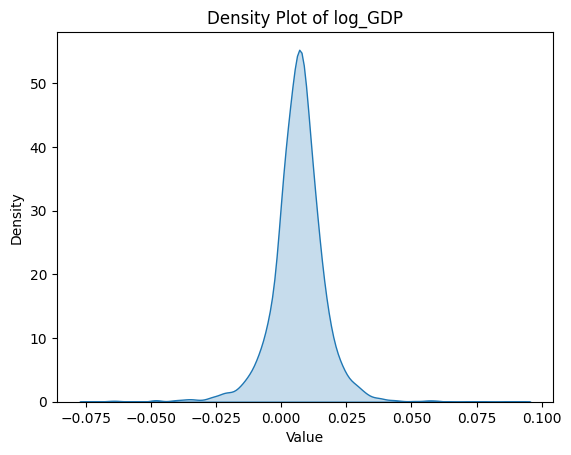

/Users/bram/Desktop/Honors Draft for Reviewers/Honors-DeepVAR-Household-Debt-Analysis/Results/helpers.py:114: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable], shade=True)


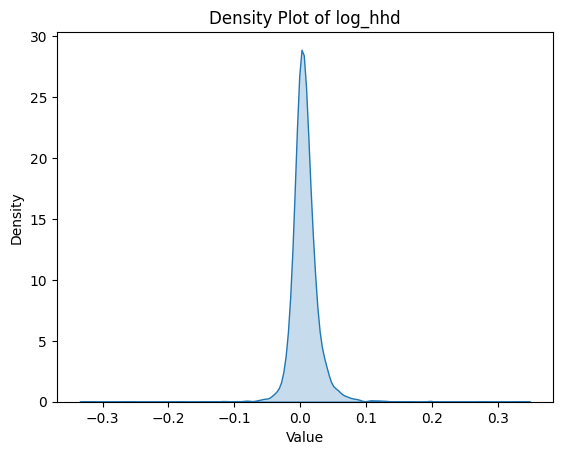

/Users/bram/Desktop/Honors Draft for Reviewers/Honors-DeepVAR-Household-Debt-Analysis/Results/helpers.py:114: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable], shade=True)


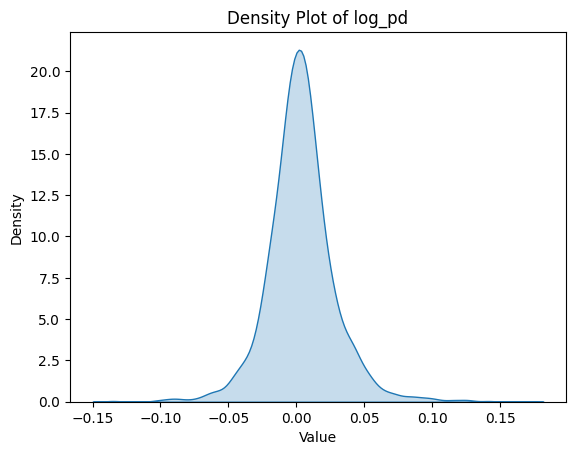

/Users/bram/Desktop/Honors Draft for Reviewers/Honors-DeepVAR-Household-Debt-Analysis/Results/helpers.py:114: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable], shade=True)


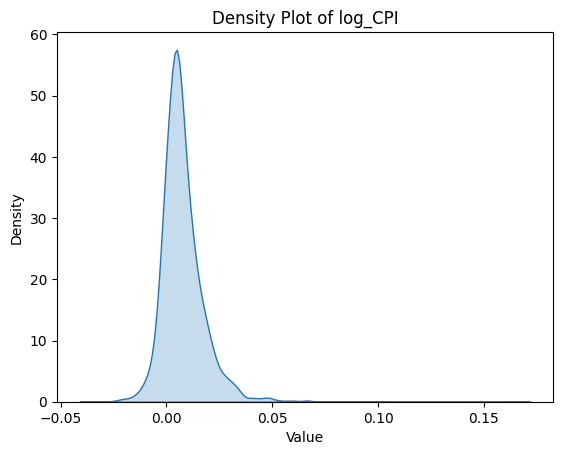

In [28]:
hp.kdensity(final_detrend_nopr, "log_GDP")
hp.kdensity(final_detrend_nopr, "log_hhd")
hp.kdensity(final_detrend_nopr, "log_pd")
hp.kdensity(final_detrend_nopr, "log_CPI")


## Get Summary Statistics

In [29]:
final_detrend_nopr.describe()

summary_stats = final_detrend_nopr.describe().transpose()

latex_table = summary_stats.to_latex(float_format="%.5f")

# Print the LaTeX code (you can copy this directly into your LaTeX document)
print(latex_table)


\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
log_GDP & 3844.00000 & 0.00639 & 0.01036 & -0.07151 & 0.00166 & 0.00676 & 0.01147 & 0.08968 \\
log_hhd & 3844.00000 & 0.00670 & 0.02298 & -0.32190 & -0.00345 & 0.00490 & 0.01455 & 0.33647 \\
log_pd & 3844.00000 & 0.00335 & 0.02521 & -0.13544 & -0.00984 & 0.00242 & 0.01512 & 0.16742 \\
log_CPI & 3844.00000 & 0.00758 & 0.01038 & -0.03516 & 0.00171 & 0.00586 & 0.01163 & 0.16602 \\
\bottomrule
\end{tabular}



In [30]:
train_dt_var_nopr, test_dt_var_nopr = hp.time_panel_split_predict(final_detrend_nopr)
excluding_outlier = hp.exclude_country(final_detrend_nopr,"Indonesia")
excluding_outliers = hp.exclude_country(final_detrend_nopr,"India")
eo_train_dt_var, eo_test_dt_var = hp.time_panel_split_predict(excluding_outliers)

all_lstm_data_nopr = lstm.create_lstm_data(final_detrend_nopr, 3)

lstm_data_subset_nopr = hp.exclude_country(all_lstm_data_nopr, "Norway")

inputs_nopr = lstm.get_lstm_input(final_detrend_nopr, 3)
lstm_train_nopr, lstm_val_nopr, lstm_test_nopr= lstm.train_val_test_split(all_lstm_data_nopr)


# print(test_dt_var_nopr.shape)
print(lstm_test_nopr.shape)
#  (780, 16)

(780, 16)


In [31]:
num_unique_countries = len(final_detrend_nopr.index.get_level_values("Country").unique())
print("Countries", num_unique_countries)
print("Number of obsevations", len(final_detrend_nopr))
# all_lstm_data_nopr.index.get_level_values("TIME_PERIOD").unique().sort_values()

Countries 36
Number of obsevations 3844


In [32]:
# all_lstm_data_nopr[all_lstm_data_nopr['private_debt']>10]
# # Ireland 2015 corporate debt restructuring. Should I omit?
# all_lstm_data_nopr[all_lstm_data_nopr['CPI']>10]
# #  Turkey and Argentina

# all_lstm_data_nopr[all_lstm_data_nopr['log_GDP']>0.15]
# # Pandemic bouncebacks
# # Pandemic crash
# all_lstm_data_nopr[all_lstm_data_nopr['log_GDP']<-0.15]

# all_lstm_data_nopr[all_lstm_data_nopr['household_debt']<-4]

# all_lstm_data_nopr[all_lstm_data_nopr['private_debt']<-10]

# recession = all_lstm_data_nopr[all_lstm_data_nopr['log_GDP']< -.01]

# average_household_debt_recession = recession['log_hhd'].mean()
# average_household_debt_recession 


Seed set to 18
Seed set to 18
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Train Loss: 0.8832, Val Loss: 0.2986
Epoch [20/200], Train Loss: 0.8651, Val Loss: 0.3023
Epoch [30/200], Train Loss: 0.8897, Val Loss: 0.3003
Epoch [40/200], Train Loss: 0.8433, Val Loss: 0.3003
Epoch [50/200], Train Loss: 0.8560, Val Loss: 0.2997
Epoch [60/200], Train Loss: 0.8446, Val Loss: 0.3002
Epoch [70/200], Train Loss: 0.8390, Val Loss: 0.2992
Epoch [80/200], Train Loss: 0.8366, Val Loss: 0.2981
Epoch [90/200], Train Loss: 0.8554, Val Loss: 0.3027
Epoch [100/200], Train Loss: 0.8584, Val Loss: 0.3007
Epoch [110/200], Train Loss: 0.8354, Val Loss: 0.3033
Epoch [120/200], Train Loss: 0.8439, Val Loss: 0.2998
Epoch [130/200], Train Loss: 0.8409, Val Loss: 0.3022
Epoch [140/200], Train Loss: 0.8308, Val Loss: 0.3025
Epoch [150/200], Train Loss: 0.8547, Val Loss: 0.3032
Epoch [160/200], Train Loss: 0.8544, Val Loss: 0.3009
Epoch [170/200], Train Loss: 0.8568, Val Loss: 0.2998
Epoch [180/200], Train Loss: 0.8377, Val Loss: 0.3017
Epoch [190/200], Train Loss: 0.9525, 

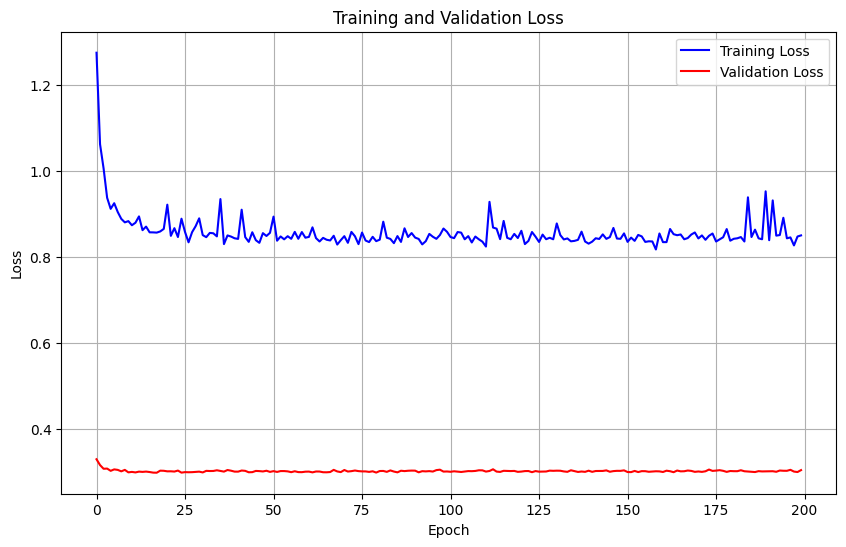

Final LSTM Metrics:
MSE: 3.907842e-05
RMSE: 0.006251273
MAE: 0.0043783933


In [33]:

GDP_model_lstm_nopr, GDP_predictions_lstm_nopr, GDP_mse_nopr, GDP_rmse_nopr, GDP_mae_nopr, GDP_scaler_X_nopr, GDP_scaler_y_nopr = lstm.train_lstm_model(all_lstm_data_nopr, inputs_nopr, ['log_GDP'], learning_rate = 0.0009, num_epochs= 200)

In [34]:
param_dict = {
    'log_hhd':{'learning_rate': 0.005, 'epochs': 200},
    'log_GDP':{'learning_rate': 0.0009, 'epochs': 200},
    'log_pd': {'learning_rate': .003, 'epochs': 100},
    'log_CPI' : {'learning_rate': .001, 'epochs': 200}
}

gdp_var_mse_nopr, gdp_var_rmse_nopr, gdp_var_mae_nopr = var.get_test_errors(final_detrend_nopr, train_dt_var_nopr, test_dt_var_nopr, 3, 'log_GDP')

eo_gdp_var_mse, eo_gdp_var_rmse, eo_gdp_var_mae = var.get_test_errors(excluding_outliers, train_dt_var_nopr, test_dt_var_nopr, 3, 'log_GDP')

GDP_lstm_metrics_nopr = [GDP_mse_nopr, GDP_rmse_nopr, GDP_mae_nopr]
GDP_var_metrics_nopr = [gdp_var_mse_nopr, gdp_var_rmse_nopr, gdp_var_mae_nopr]
GDP_no_outlier_var_metrics_nopr = [eo_gdp_var_mse, eo_gdp_var_rmse, eo_gdp_var_mae]




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/

Seed set to 18
Seed set to 18
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Train Loss: 0.8036, Val Loss: 0.1398
Epoch [20/200], Train Loss: 0.7732, Val Loss: 0.1342
Epoch [30/200], Train Loss: 0.7909, Val Loss: 0.1450
Epoch [40/200], Train Loss: 0.7687, Val Loss: 0.1383
Epoch [50/200], Train Loss: 0.7535, Val Loss: 0.1399
Epoch [60/200], Train Loss: 0.7874, Val Loss: 0.1356
Epoch [70/200], Train Loss: 0.7494, Val Loss: 0.1368
Epoch [80/200], Train Loss: 0.7736, Val Loss: 0.1353
Epoch [90/200], Train Loss: 0.7853, Val Loss: 0.1352
Epoch [100/200], Train Loss: 0.7648, Val Loss: 0.1337
Epoch [110/200], Train Loss: 0.7630, Val Loss: 0.1336
Epoch [120/200], Train Loss: 0.7619, Val Loss: 0.1365
Epoch [130/200], Train Loss: 0.7601, Val Loss: 0.1335
Epoch [140/200], Train Loss: 0.7583, Val Loss: 0.1346
Epoch [150/200], Train Loss: 0.7922, Val Loss: 0.1404
Epoch [160/200], Train Loss: 0.7628, Val Loss: 0.1350
Epoch [170/200], Train Loss: 0.7513, Val Loss: 0.1352
Epoch [180/200], Train Loss: 0.7433, Val Loss: 0.1339
Epoch [190/200], Train Loss: 0.7771, 

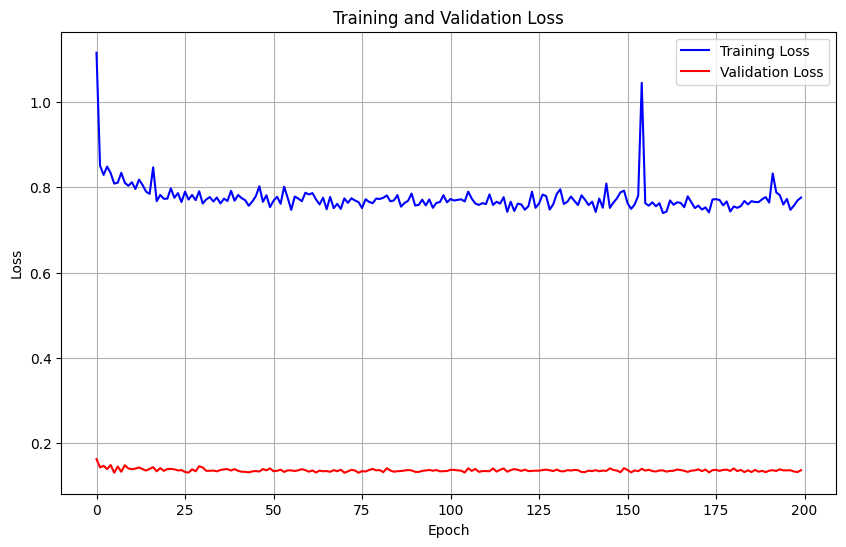

Final LSTM Metrics:
MSE: 8.590871e-05
RMSE: 0.0092686955
MAE: 0.0065828324


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/

In [35]:
hhd_model_lstm_nopr, hhd_predictions_lstm_nopr, hhd_mse_nopr, hhd_rmse_nopr, hhd_mae_nopr, hhd_scaler_X_nopr, hhd_scaler_y_nopr = lstm.train_lstm_model(all_lstm_data_nopr, inputs_nopr, ['log_hhd'], .003, num_epochs= 200)
hhd_var_mse_nopr, hhd_var_rmse_nopr, hhd_var_mae_nopr = var.get_test_errors(final_detrend_nopr, train_dt_var_nopr, test_dt_var_nopr, 3, 'log_hhd')
eo_hhd_var_mse_nopr, eo_hhd_var_rmse_nopr, eo_hhd_var_mae_nopr = var.get_test_errors(excluding_outliers, train_dt_var_nopr, test_dt_var_nopr, 3, 'log_hhd')

hhd_lstm_metrics_nopr = [hhd_mse_nopr, hhd_rmse_nopr, hhd_mae_nopr]
hhd_var_metrics_nopr = [hhd_var_mse_nopr, hhd_var_rmse_nopr, hhd_var_mae_nopr]
hhd_no_outlier_var_metrics_nopr = [eo_hhd_var_mse_nopr, eo_hhd_var_rmse_nopr, eo_hhd_var_mae_nopr]

Seed set to 18
Seed set to 18
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/100], Train Loss: 0.9003, Val Loss: 0.5237
Epoch [20/100], Train Loss: 0.9037, Val Loss: 0.5118
Epoch [30/100], Train Loss: 0.9209, Val Loss: 0.5304
Epoch [40/100], Train Loss: 0.8912, Val Loss: 0.5181
Epoch [50/100], Train Loss: 0.8846, Val Loss: 0.5221
Epoch [60/100], Train Loss: 0.8775, Val Loss: 0.5137
Epoch [70/100], Train Loss: 0.8783, Val Loss: 0.5207
Epoch [80/100], Train Loss: 0.8860, Val Loss: 0.5205
Epoch [90/100], Train Loss: 0.8685, Val Loss: 0.5173
Epoch [100/100], Train Loss: 0.8751, Val Loss: 0.5175


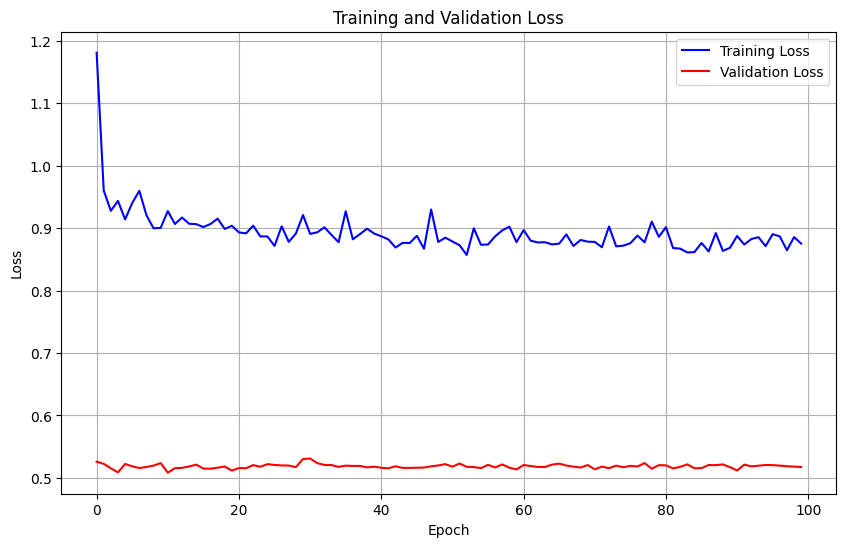

Final LSTM Metrics:
MSE: 0.000360044
RMSE: 0.018974826
MAE: 0.013636499


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/

In [36]:
fd_model_lstm_nopr, fd_predictions_lstm_nopr, fd_mse_nopr, fd_rmse_nopr, fd_mae_nopr, fd_scaler_X_nopr, fd_scaler_y_nopr = lstm.train_lstm_model(all_lstm_data_nopr, inputs_nopr, ['log_pd'], .003, num_epochs= 100)
fd_var_mse_nopr, fd_var_rmse_nopr, fd_var_mae_nopr = var.get_test_errors(final_detrend_nopr, train_dt_var_nopr, test_dt_var_nopr, 3, 'log_pd')
eo_fd_var_mse_nopr, eo_fd_var_rmse_nopr, eo_fd_var_mae_nopr = var.get_test_errors(excluding_outliers, train_dt_var_nopr, test_dt_var_nopr, 3, 'log_pd')

fd_lstm_metrics_nopr = [fd_mse_nopr, fd_rmse_nopr, fd_mae_nopr]
fd_var_metrics_nopr = [fd_var_mse_nopr, fd_var_rmse_nopr, fd_var_mae_nopr]
fd_no_outlier_var_metrics_nopr = [eo_fd_var_mse_nopr, eo_fd_var_rmse_nopr, eo_fd_var_mae_nopr]


Seed set to 18
Seed set to 18
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Train Loss: 0.7222, Val Loss: 0.3979
Epoch [20/200], Train Loss: 0.7006, Val Loss: 0.3783
Epoch [30/200], Train Loss: 0.7126, Val Loss: 0.3735
Epoch [40/200], Train Loss: 0.6605, Val Loss: 0.3846
Epoch [50/200], Train Loss: 0.6555, Val Loss: 0.3841
Epoch [60/200], Train Loss: 0.6665, Val Loss: 0.3806
Epoch [70/200], Train Loss: 0.6826, Val Loss: 0.3811
Epoch [80/200], Train Loss: 0.6536, Val Loss: 0.3794
Epoch [90/200], Train Loss: 0.6726, Val Loss: 0.3777
Epoch [100/200], Train Loss: 0.6459, Val Loss: 0.3760
Epoch [110/200], Train Loss: 0.6670, Val Loss: 0.3797
Epoch [120/200], Train Loss: 0.6515, Val Loss: 0.3773
Epoch [130/200], Train Loss: 0.6487, Val Loss: 0.3787
Epoch [140/200], Train Loss: 0.6632, Val Loss: 0.3798
Epoch [150/200], Train Loss: 0.6410, Val Loss: 0.3829
Epoch [160/200], Train Loss: 0.6719, Val Loss: 0.3775
Epoch [170/200], Train Loss: 0.6565, Val Loss: 0.3839
Epoch [180/200], Train Loss: 0.6494, Val Loss: 0.3800
Epoch [190/200], Train Loss: 0.6842, 

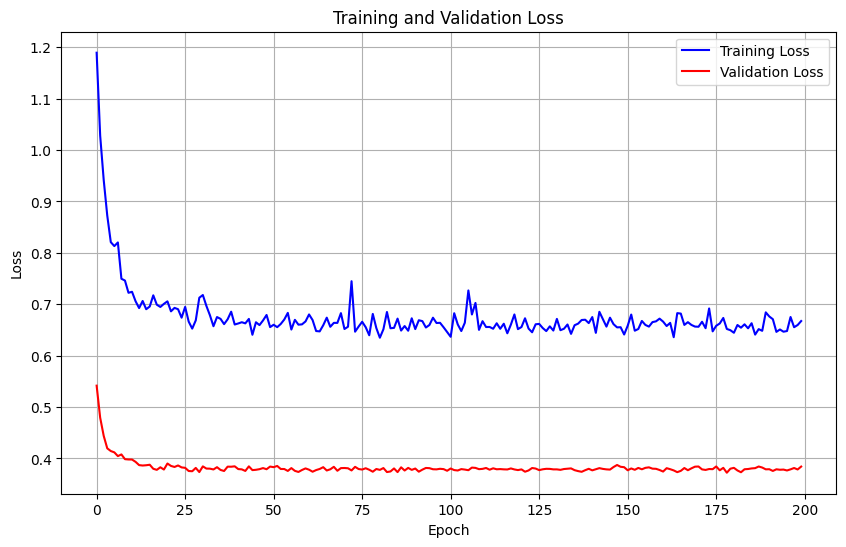

Final LSTM Metrics:
MSE: 4.1737934e-05
RMSE: 0.00646049
MAE: 0.004920721


In [37]:
# pr_model_lstm_nopr, pr_predictions_lstm_nopr, pr_mse_nopr, pr_rmse_nopr, pr_mae_nopr, pr_scaler_X_nopr, pr_scaler_y_nopr= train_lstm_model(all_lstm_data_nopr, inputs_nopr, ['policy_rate'], .002, num_epochs= 200)
# er_model_lstm_nopr, er_predictions_lstm_nopr, er_mse_nopr, er_rmse_nopr, er_mae_nopr, er_scaler_X_nopr, er_scaler_y_nopr = train_lstm_model(all_lstm_data_nopr, inputs_nopr, ['exchange_rate'], .002, num_epochs= 200)

cpi_model_lstm_nopr, cpi_predictions_lstm_nopr, cpi_mse_nopr, cpi_rmse_nopr, cpi_mae_nopr, cpi_scaler_X_nopr, cpi_scaler_y_nopr = lstm.train_lstm_model(all_lstm_data_nopr, inputs_nopr, ['log_CPI'], .0005, num_epochs= 200)

Seed set to 18
Seed set to 18
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Train Loss: 0.8832, Val Loss: 0.2986
Epoch [20/200], Train Loss: 0.8651, Val Loss: 0.3023
Epoch [30/200], Train Loss: 0.8897, Val Loss: 0.3003
Epoch [40/200], Train Loss: 0.8433, Val Loss: 0.3003
Epoch [50/200], Train Loss: 0.8560, Val Loss: 0.2997
Epoch [60/200], Train Loss: 0.8446, Val Loss: 0.3002
Epoch [70/200], Train Loss: 0.8390, Val Loss: 0.2992
Epoch [80/200], Train Loss: 0.8366, Val Loss: 0.2981
Epoch [90/200], Train Loss: 0.8554, Val Loss: 0.3027
Epoch [100/200], Train Loss: 0.8584, Val Loss: 0.3007
Epoch [110/200], Train Loss: 0.8354, Val Loss: 0.3033
Epoch [120/200], Train Loss: 0.8439, Val Loss: 0.2998
Epoch [130/200], Train Loss: 0.8409, Val Loss: 0.3022
Epoch [140/200], Train Loss: 0.8308, Val Loss: 0.3025
Epoch [150/200], Train Loss: 0.8547, Val Loss: 0.3032
Epoch [160/200], Train Loss: 0.8544, Val Loss: 0.3009
Epoch [170/200], Train Loss: 0.8568, Val Loss: 0.2998
Epoch [180/200], Train Loss: 0.8377, Val Loss: 0.3017
Epoch [190/200], Train Loss: 0.9525, 

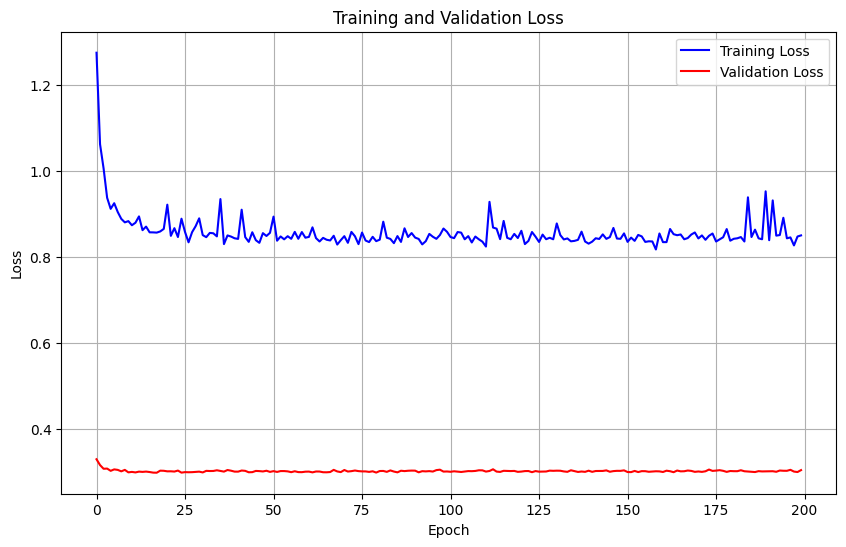

Seed set to 18
Seed set to 18


Final LSTM Metrics:
MSE: 3.907842e-05
RMSE: 0.006251273
MAE: 0.0043783933


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Train Loss: 0.7989, Val Loss: 0.1454
Epoch [20/200], Train Loss: 0.7653, Val Loss: 0.1367
Epoch [30/200], Train Loss: 0.7796, Val Loss: 0.1435
Epoch [40/200], Train Loss: 0.7571, Val Loss: 0.1362
Epoch [50/200], Train Loss: 0.7376, Val Loss: 0.1390
Epoch [60/200], Train Loss: 0.7756, Val Loss: 0.1357
Epoch [70/200], Train Loss: 0.7389, Val Loss: 0.1365
Epoch [80/200], Train Loss: 0.7532, Val Loss: 0.1345
Epoch [90/200], Train Loss: 0.7650, Val Loss: 0.1344
Epoch [100/200], Train Loss: 0.7499, Val Loss: 0.1333
Epoch [110/200], Train Loss: 0.7452, Val Loss: 0.1345
Epoch [120/200], Train Loss: 0.7450, Val Loss: 0.1360
Epoch [130/200], Train Loss: 0.7408, Val Loss: 0.1337
Epoch [140/200], Train Loss: 0.7428, Val Loss: 0.1344
Epoch [150/200], Train Loss: 0.7759, Val Loss: 0.1404
Epoch [160/200], Train Loss: 0.7474, Val Loss: 0.1355
Epoch [170/200], Train Loss: 0.7361, Val Loss: 0.1352
Epoch [180/200], Train Loss: 0.7253, Val Loss: 0.1341
Epoch [190/200], Train Loss: 0.7606, 

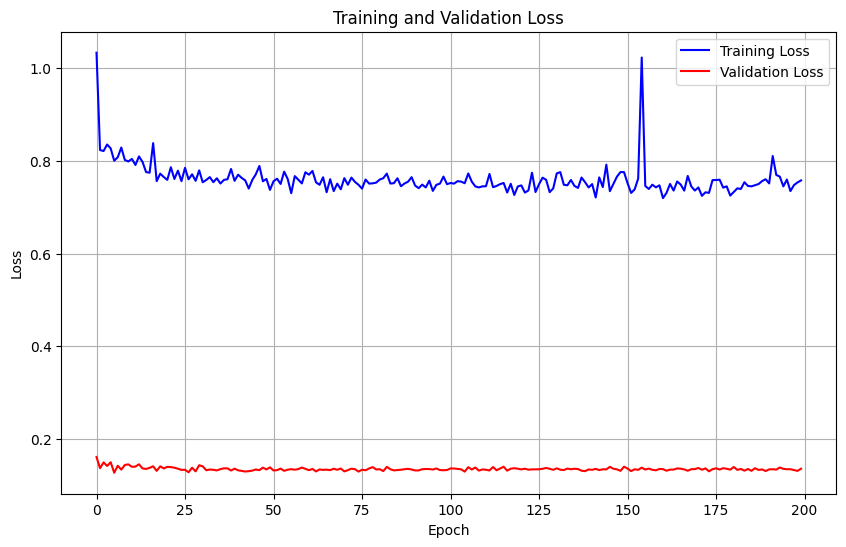

Seed set to 18
Seed set to 18


Final LSTM Metrics:
MSE: 8.622257e-05
RMSE: 0.009285611
MAE: 0.0065960027


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/100], Train Loss: 0.9003, Val Loss: 0.5237
Epoch [20/100], Train Loss: 0.9037, Val Loss: 0.5118
Epoch [30/100], Train Loss: 0.9209, Val Loss: 0.5304
Epoch [40/100], Train Loss: 0.8912, Val Loss: 0.5181
Epoch [50/100], Train Loss: 0.8846, Val Loss: 0.5221
Epoch [60/100], Train Loss: 0.8775, Val Loss: 0.5137
Epoch [70/100], Train Loss: 0.8783, Val Loss: 0.5207
Epoch [80/100], Train Loss: 0.8860, Val Loss: 0.5205
Epoch [90/100], Train Loss: 0.8685, Val Loss: 0.5173
Epoch [100/100], Train Loss: 0.8751, Val Loss: 0.5175


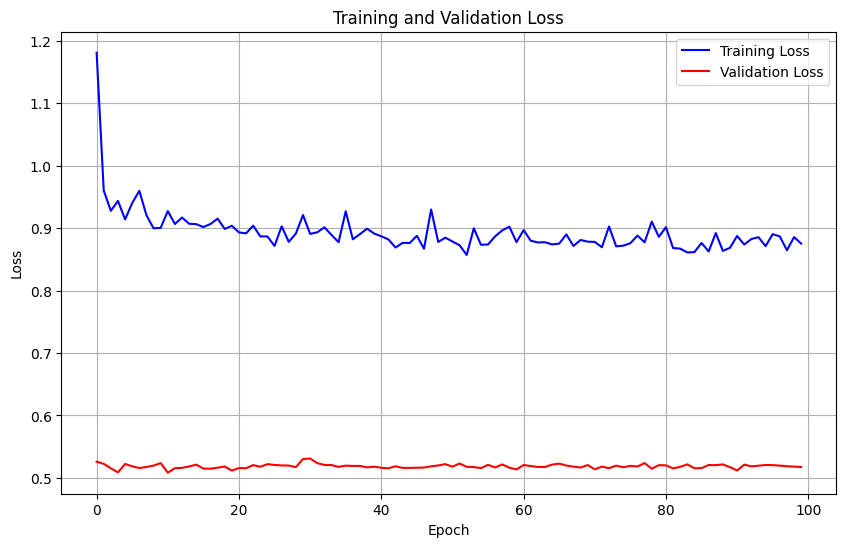

Seed set to 18
Seed set to 18


Final LSTM Metrics:
MSE: 0.000360044
RMSE: 0.018974826
MAE: 0.013636499


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Train Loss: 0.6871, Val Loss: 0.3858
Epoch [20/200], Train Loss: 0.6742, Val Loss: 0.3739
Epoch [30/200], Train Loss: 0.6883, Val Loss: 0.3721
Epoch [40/200], Train Loss: 0.6419, Val Loss: 0.3878
Epoch [50/200], Train Loss: 0.6383, Val Loss: 0.3880
Epoch [60/200], Train Loss: 0.6472, Val Loss: 0.3862
Epoch [70/200], Train Loss: 0.6540, Val Loss: 0.3845
Epoch [80/200], Train Loss: 0.6304, Val Loss: 0.3826
Epoch [90/200], Train Loss: 0.6496, Val Loss: 0.3818
Epoch [100/200], Train Loss: 0.6277, Val Loss: 0.3805
Epoch [110/200], Train Loss: 0.6438, Val Loss: 0.3840
Epoch [120/200], Train Loss: 0.6315, Val Loss: 0.3813
Epoch [130/200], Train Loss: 0.6253, Val Loss: 0.3824
Epoch [140/200], Train Loss: 0.6354, Val Loss: 0.3843
Epoch [150/200], Train Loss: 0.6179, Val Loss: 0.3874
Epoch [160/200], Train Loss: 0.6460, Val Loss: 0.3809
Epoch [170/200], Train Loss: 0.6316, Val Loss: 0.3910
Epoch [180/200], Train Loss: 0.6283, Val Loss: 0.3844
Epoch [190/200], Train Loss: 0.6557, 

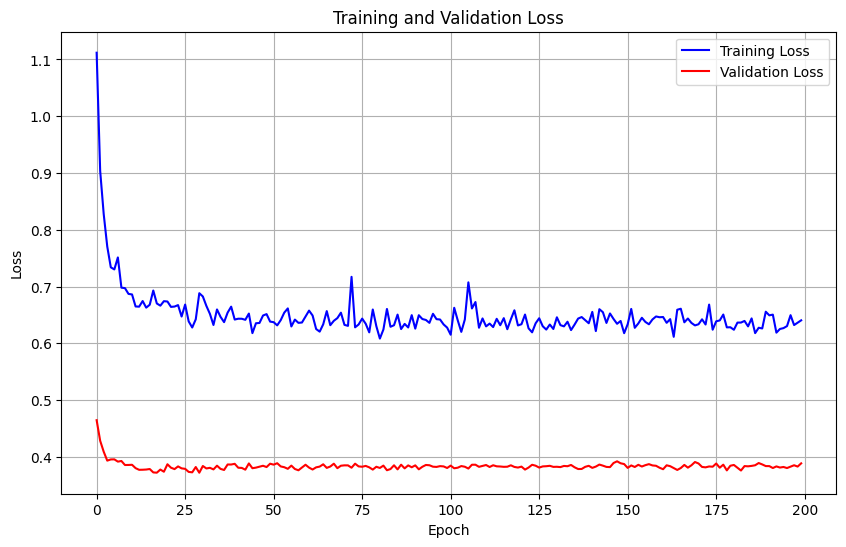

Final LSTM Metrics:
MSE: 4.2227904e-05
RMSE: 0.0064983
MAE: 0.004932353


In [38]:
variables = final_detrend_nopr.columns
model_scaler_dict = get_model_and_scaler(all_lstm_data_nopr, variables, inputs_nopr, param_dict)

In [39]:
gdp_deepvar_metrics_nopr = deepvar.test_errors(all_lstm_data_nopr, lstm_test_nopr, 'log_GDP', model_scaler_dict)
hhd_deepvar_metrics_nopr = deepvar.test_errors(all_lstm_data_nopr, lstm_test_nopr, 'log_hhd', model_scaler_dict)
fd_deepvar_metrics_nopr = deepvar.test_errors(all_lstm_data_nopr, lstm_test_nopr, 'log_pd', model_scaler_dict)

Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set t

In [40]:
gdp_latex_comparison_table_nopr = hp.create_model_comparison_latex_table(gdp_deepvar_metrics_nopr , GDP_var_metrics_nopr, GDP_no_outlier_var_metrics_nopr)
print(gdp_latex_comparison_table_nopr)

hhd_latex_comparison_table_nopr = hp.create_model_comparison_latex_table(hhd_deepvar_metrics_nopr, hhd_var_metrics_nopr, hhd_no_outlier_var_metrics_nopr)
print(hhd_latex_comparison_table_nopr)

fd_latex_comparison_table_nopr = hp.create_model_comparison_latex_table(fd_deepvar_metrics_nopr, fd_var_metrics_nopr, fd_no_outlier_var_metrics_nopr)
print(fd_latex_comparison_table_nopr)


\begin{table}[htbp]
\centering
\caption{Model Performance Comparison}
\begin{tabular}{lccc}
\hline
\textbf{Metric} & \textbf{DeepVAR} & \textbf{VAR} & \textbf{VAR (Excluding Growth Outliers)} \\
\hline
Mean Squared Error (MSE) & 0.000040 & 0.000056 & 0.000055 \\
Root Mean Squared Error (RMSE) & 0.006326 & 0.007464 & 0.007420 \\
Mean Absolute Error (MAE) & 0.004485 & 0.005192 & 0.005135 \\
\hline
\end{tabular}
\end{table}
\begin{table}[htbp]
\centering
\caption{Model Performance Comparison}
\begin{tabular}{lccc}
\hline
\textbf{Metric} & \textbf{DeepVAR} & \textbf{VAR} & \textbf{VAR (Excluding Growth Outliers)} \\
\hline
Mean Squared Error (MSE) & 0.000120 & 0.000167 & 0.000151 \\
Root Mean Squared Error (RMSE) & 0.010971 & 0.012929 & 0.012286 \\
Mean Absolute Error (MAE) & 0.008281 & 0.009190 & 0.008937 \\
\hline
\end{tabular}
\end{table}
\begin{table}[htbp]
\centering
\caption{Model Performance Comparison}
\begin{tabular}{lccc}
\hline
\textbf{Metric} & \textbf{DeepVAR} & \textbf{VAR} &

In [41]:
def calculate_percent_improvement(deepvar_metrics, compare_metrics):
    improvements = {}
    
    # Define the metric names for clarity (order should match the input lists)
    metric_names = ['total_mse', 'rmse', 'total_mae']
    
    for i, metric in enumerate(metric_names):
        # Get the values for DeepVAR and the comparison model
        deepvar_value = deepvar_metrics[i]
        compare_value = compare_metrics[i]
        
        if compare_value != 0:  
            improvement = ((compare_value - deepvar_value) / compare_value) * 100
            improvements[metric] = improvement
        else:
            improvements[metric] = None  
    
    return improvements

improvement_deepvar_vs_var_gdp = calculate_percent_improvement(gdp_deepvar_metrics_nopr, GDP_var_metrics_nopr)
print("GDP model improvement",improvement_deepvar_vs_var_gdp)


improvement_deepvar_vs_var_hhd = calculate_percent_improvement(hhd_deepvar_metrics_nopr, hhd_var_metrics_nopr)
print("household debt model improvement",improvement_deepvar_vs_var_hhd)

improvement_deepvar_vs_var_pd = calculate_percent_improvement(fd_deepvar_metrics_nopr, fd_var_metrics_nopr)
print("private debt model improvement",improvement_deepvar_vs_var_pd)

GDP model improvement {'total_mse': 28.166125900427264, 'rmse': 15.24513341431494, 'total_mae': 13.62973851495479}
household debt model improvement {'total_mse': 27.993849395425208, 'rmse': 15.14356205650936, 'total_mae': 9.89632361128033}
private debt model improvement {'total_mse': 10.636590503835889, 'rmse': 5.467778246693005, 'total_mae': 4.278707668293902}


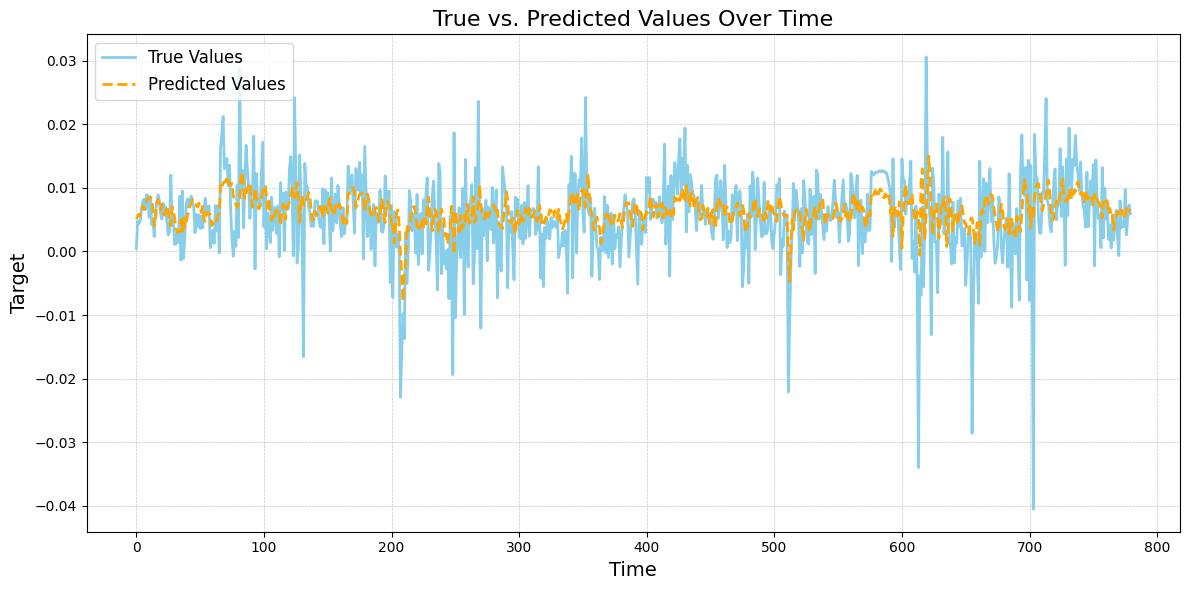

log_GDP   log_hhd    log_pd   log_CPI  log_GDP_lag1  \
Country  TIME_PERIOD                                                         
Colombia 2017-03-31   0.000451  0.002397 -0.021134  0.021572      0.005816   
         2017-06-30   0.004779  0.016734 -0.009647  0.013025      0.000451   
         2017-09-30   0.004386  0.000374 -0.022358  0.002069      0.004779   
         2017-12-31   0.004816  0.007185 -0.016225  0.003390      0.004386   
         2018-03-31   0.006612  0.001483 -0.011614  0.014911      0.004816   
...                        ...       ...       ...       ...           ...   
Belgium  2018-12-31   0.009724  0.005046  0.005970  0.007474      0.003900   
         2019-03-31   0.002609  0.006689 -0.001324  0.001629      0.009724   
         2019-06-30   0.005386  0.004988 -0.005978  0.003588      0.002609   
         2019-09-30   0.007315  0.000000  0.015207 -0.001133      0.005386   
         2019-12-31   0.005931  0.011542 -0.009229  0.001317      0.007315   

                      log_GDP_lag2  log_GDP_lag3  log_hhd_lag1  log_hhd_lag2  \
Country  TIME_PERIOD                                                           
Colombia 2017-03-31       0.003739     -0.000674     -0.011440     -0.002633   
         2017-06-30       0.005816      0.003739      0.002397     -0.011440   
         2017-09-30       0.000451      0.005816      0.016734      0.002397   
         2017-12-31       0.004779      0.000451      0.000374      0.016734   
         2018-03-31       0.004386      0.004779      0.007185      0.000374   
...                            ...           ...           ...           ...   
Belgium  2018-12-31       0.004515      0.003720     -0.001685      0.006757   
         2019-03-31       0.003900      0.004515      0.005046     -0.001685   
         2019-06-30       0.009724      0.003900      0.006689      0.005046   
         2019-09-30       0.002609      0.009724      0.004988      0.006689   
         2019-12-31       0.005386      0.002609      0.000000      0.004988   

                      log_hhd_lag3  log_pd_lag1  log_pd_lag2  log_pd_lag3  \
Country  TIME_PERIOD                                                        
Colombia 2017-03-31      -0.002551    -0.024465    -0.017116    -0.018893   
         2017-06-30      -0.002633    -0.021134    -0.024465    -0.017116   
         2017-09-30      -0.011440    -0.009647    -0.021134    -0.024465   
         2017-12-31       0.002397    -0.022358    -0.009647    -0.021134   
         2018-03-31       0.016734    -0.016225    -0.022358    -0.009647   
...                            ...          ...          ...          ...   
Belgium  2018-12-31      -0.005072    -0.022369     0.001954    -0.019368   
         2019-03-31       0.006757     0.005970    -0.022369     0.001954   
         2019-06-30      -0.001685    -0.001324     0.005970    -0.022369   
         2019-09-30       0.005046    -0.005978    -0.001324     0.005970   
         2019-12-31       0.006689     0.015207    -0.005978    -0.001324   

                      log_CPI_lag1  log_CPI_lag2  log_CPI_lag3  
Country  TIME_PERIOD                                            
Colombia 2017-03-31       0.000114      0.007752      0.020401  
         2017-06-30       0.021572      0.000114      0.007752  
         2017-09-30       0.013025      0.021572      0.000114  
         2017-12-31       0.002069      0.013025      0.021572  
         2018-03-31       0.003390      0.002069      0.013025  
...                            ...           ...           ...  
Belgium  2018-12-31       0.006126      0.006163      0.006107  
         2019-03-31       0.007474      0.006126      0.006163  
         2019-06-30       0.001629      0.007474      0.006126  
         2019-09-30       0.003588      0.001629      0.007474  
         2019-12-31      -0.001133      0.003588      0.001629  

[780 rows x 16 columns]

In [42]:
plot_data_nopr = lstm_test_nopr.reset_index().drop(columns = {"Country","TIME_PERIOD"})
plot_data_nopr = plot_data_nopr['log_GDP']

visualize_model_performance(plot_data_nopr, GDP_predictions_lstm_nopr)

# GDP_predictions_lstm_df = pd.DataFrame(GDP_predictions_lstm_nopr, columns=["log_GDP"])
# GDP_predictions_lstm_df = GDP_predictions_lstm_df.set_index(lstm_test_nopr.index)

# GDP_predictions_lstm_nopr
lstm_test_nopr


In [43]:
lstm_test_data = hp.get_test_data(all_lstm_data_nopr)

deepvar.test_errors(all_lstm_data_nopr, lstm_test_nopr, 'log_GDP', model_scaler_dict)


Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18
Seed set to 18


[4.001909806245241e-05, 0.006326064974567714, 0.004484563581103059]

In [44]:
all_lstm_data_nopr.index.get_level_values("Country").unique()

Index(['Colombia', 'Netherlands, The', 'United Kingdom', 'India', 'Israel',
       'Sweden', 'Thailand', 'Australia', 'New Zealand', 'Germany', 'Brazil',
       'Mexico', 'Greece', 'Norway', 'Austria', 'Italy', 'Singapore', 'France',
       'Portugal', 'Hungary', 'Spain', 'Canada', 'Switzerland',
       'United States', 'Denmark', 'Indonesia', 'China, P.R.: Hong Kong',
       'Luxembourg', 'Japan', 'Finland', 'South Africa', 'Chile', 'Czech Rep.',
       'Poland, Rep. of', 'Korea, Rep. of', 'Belgium'],
      dtype='object', name='Country')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


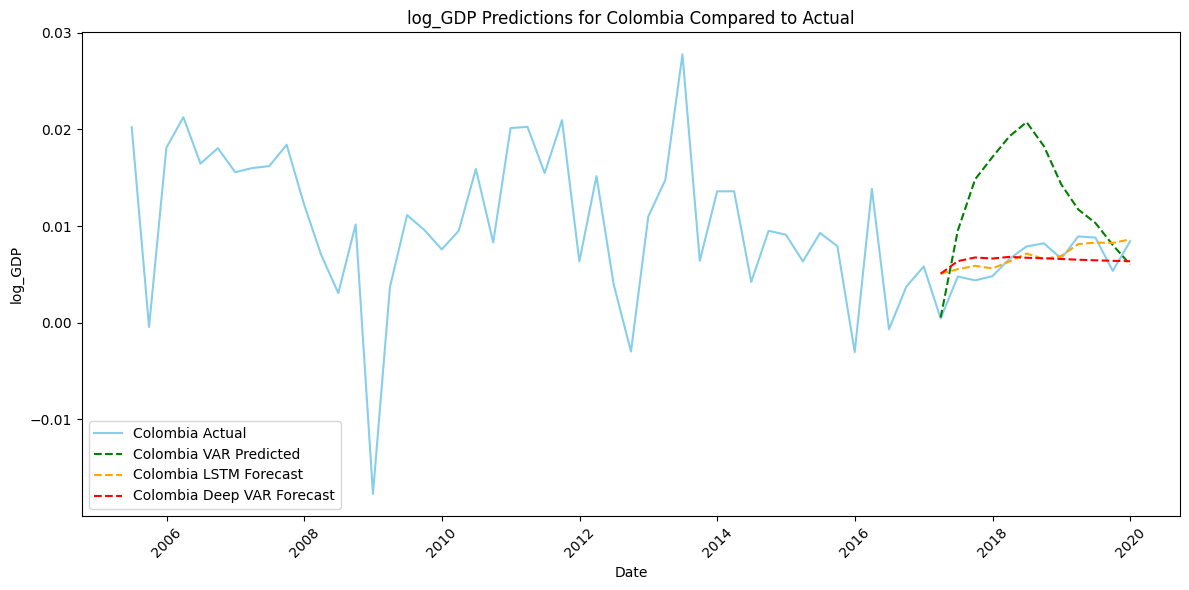

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


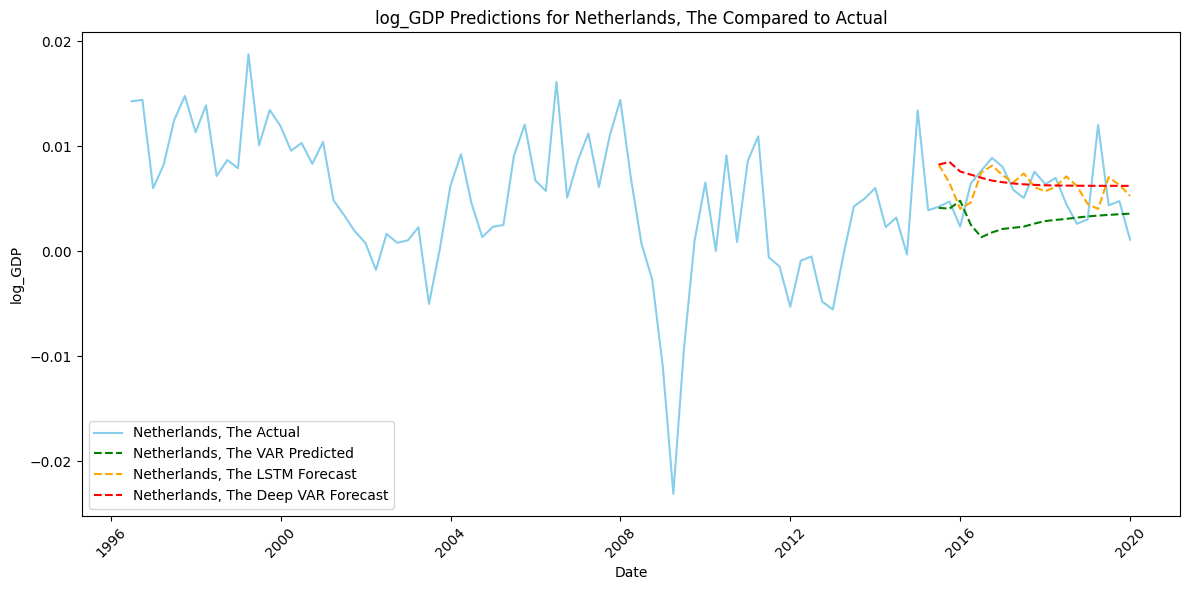

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


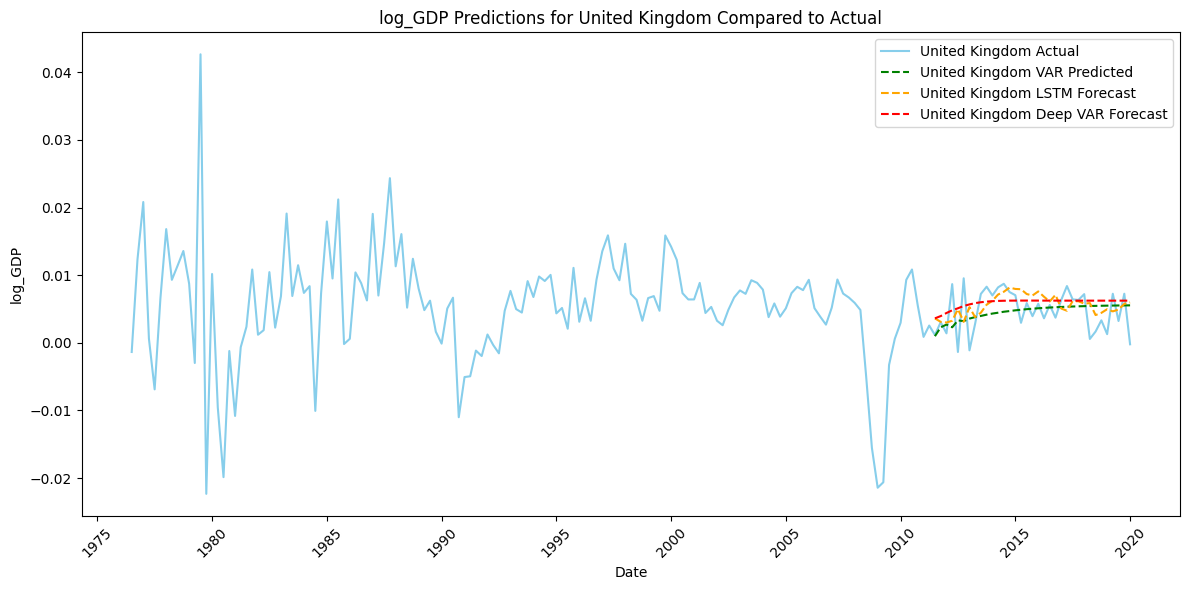

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


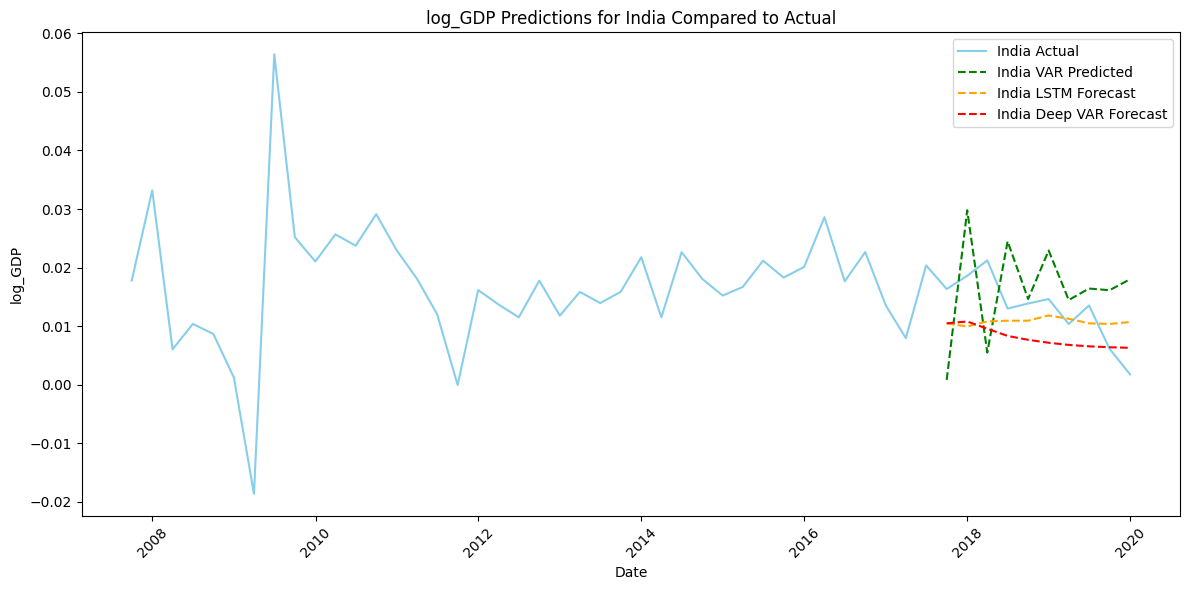

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


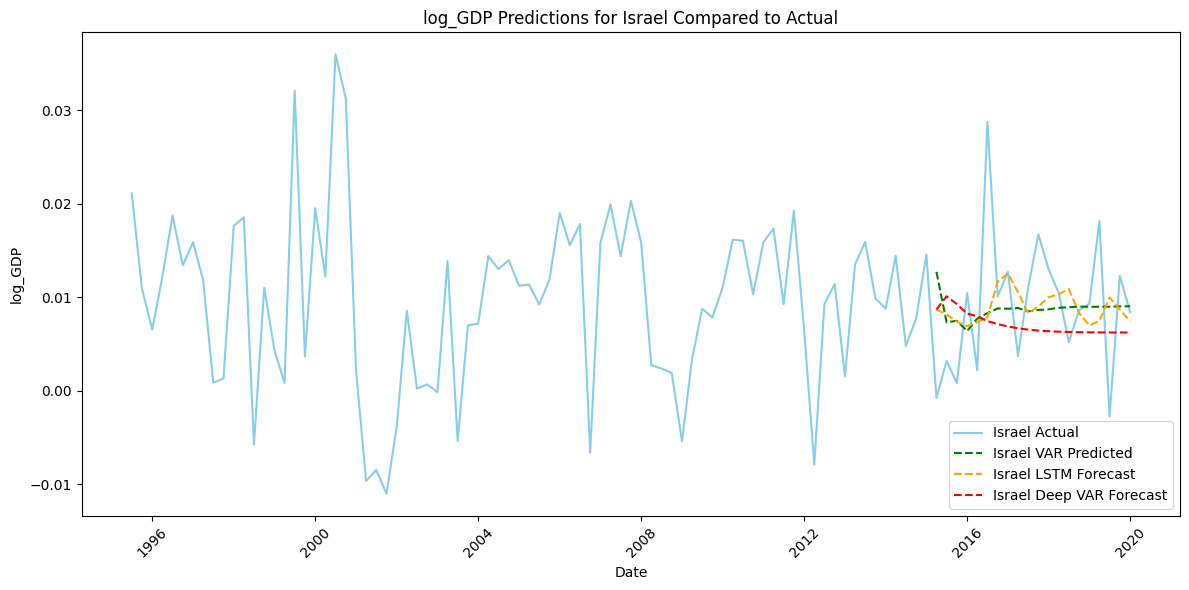

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


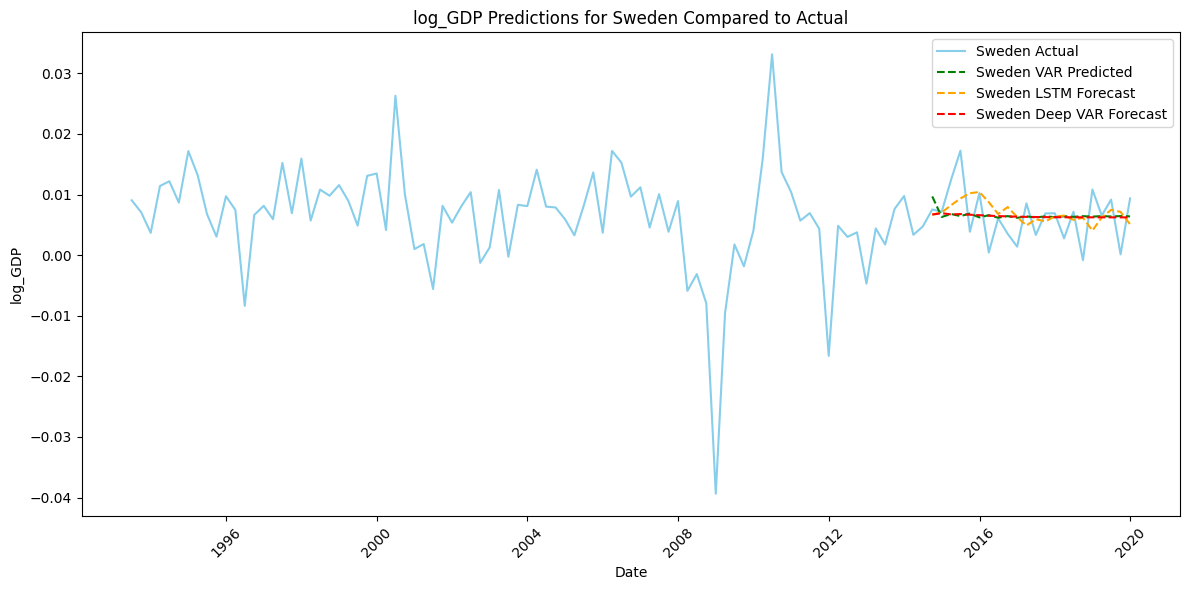

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


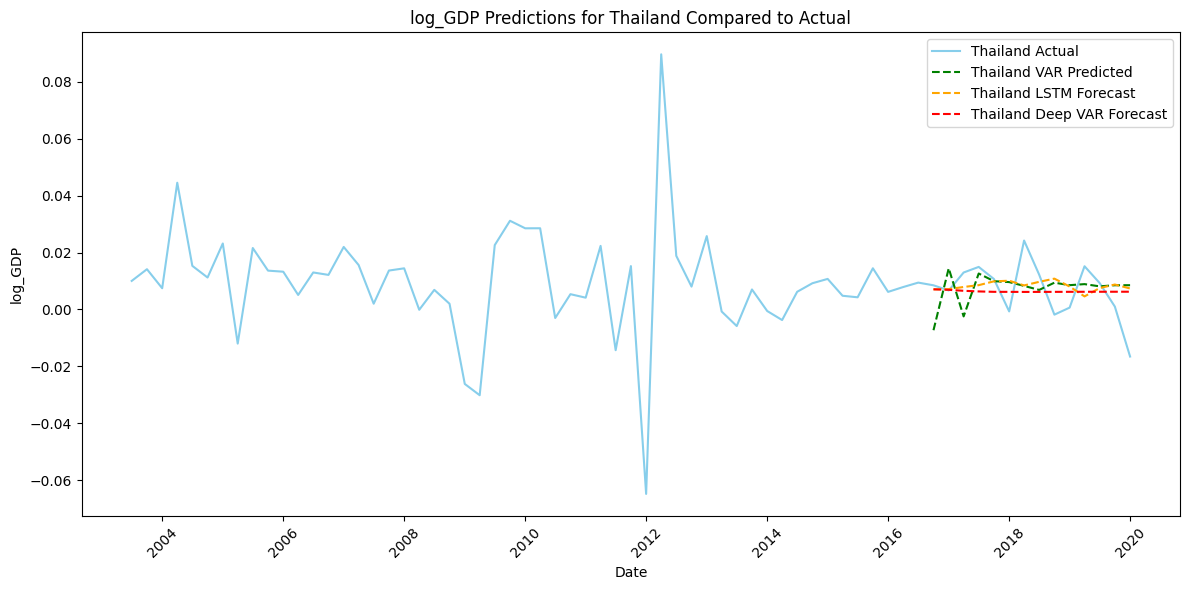

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


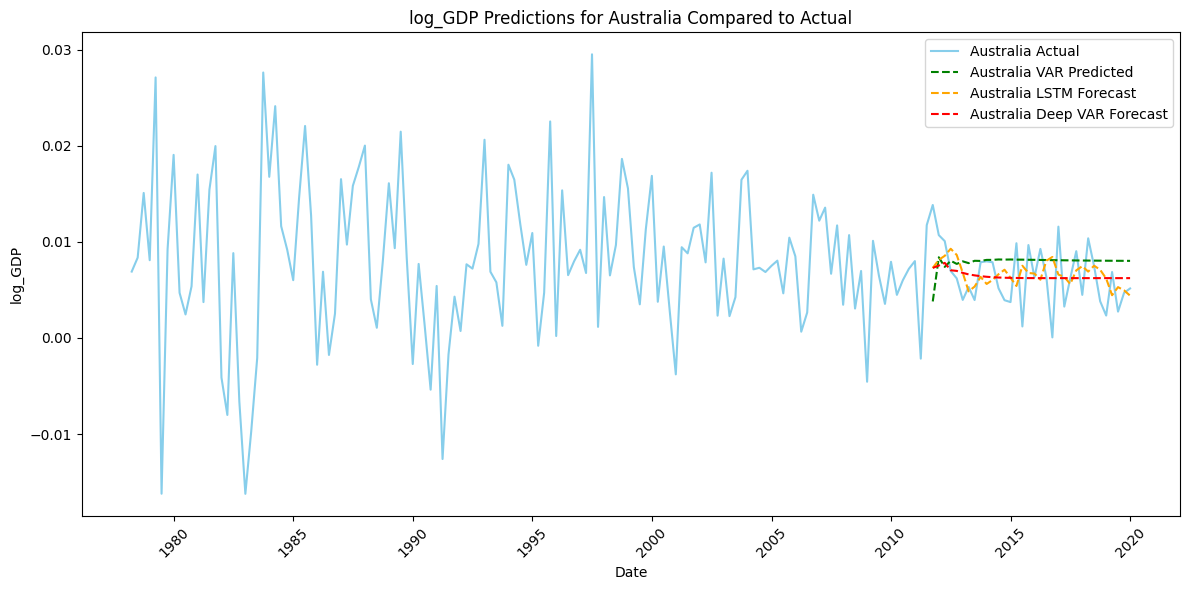

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


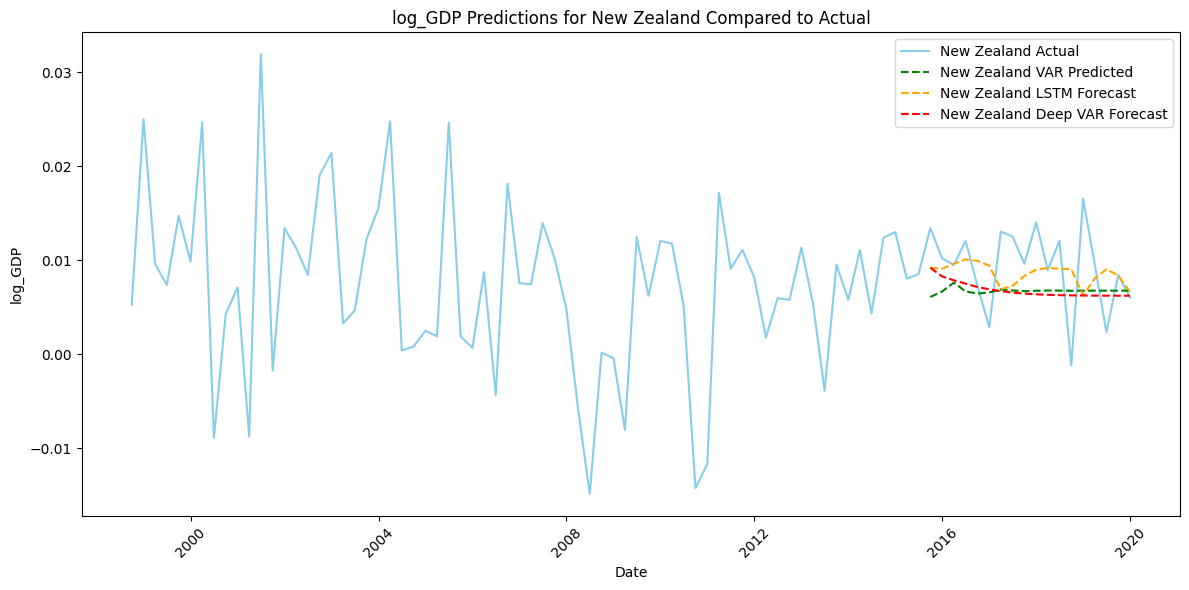

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


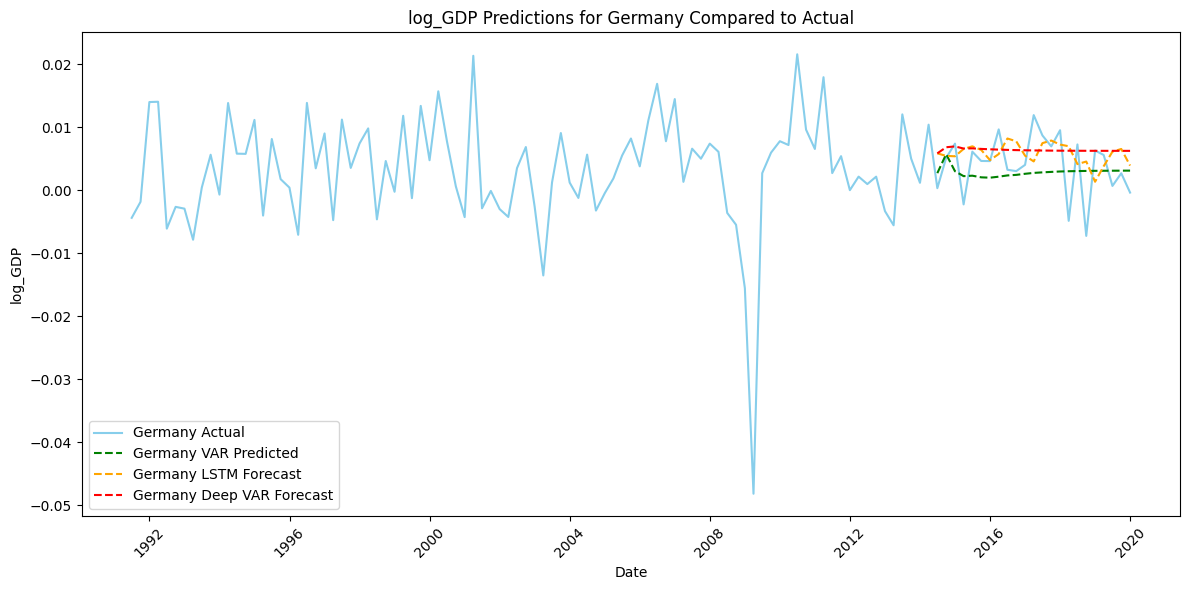

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


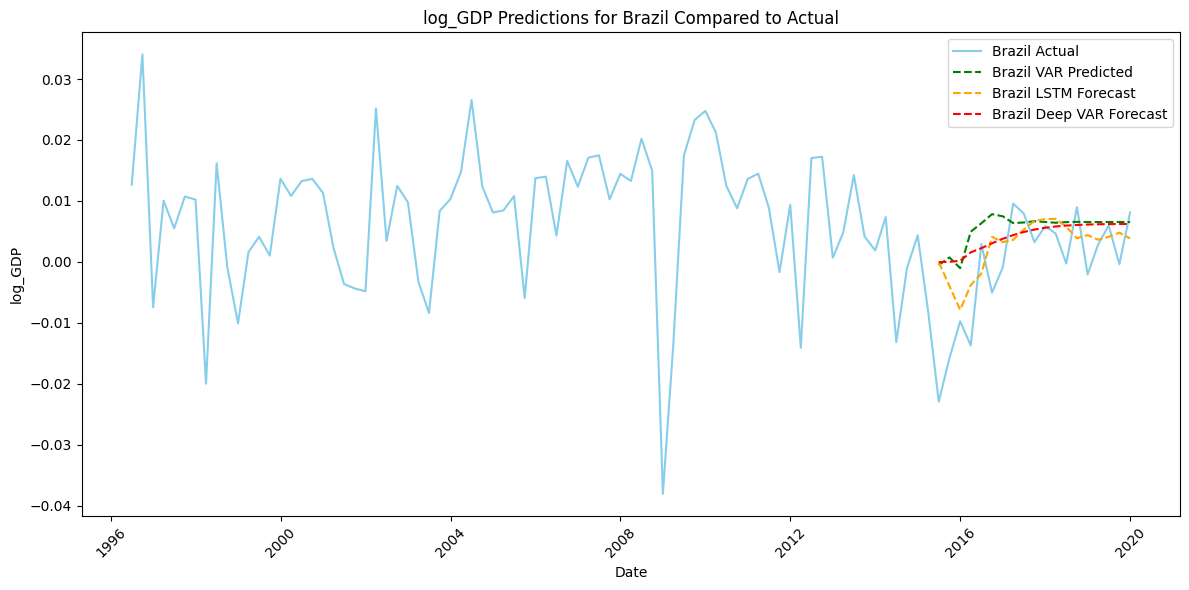

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


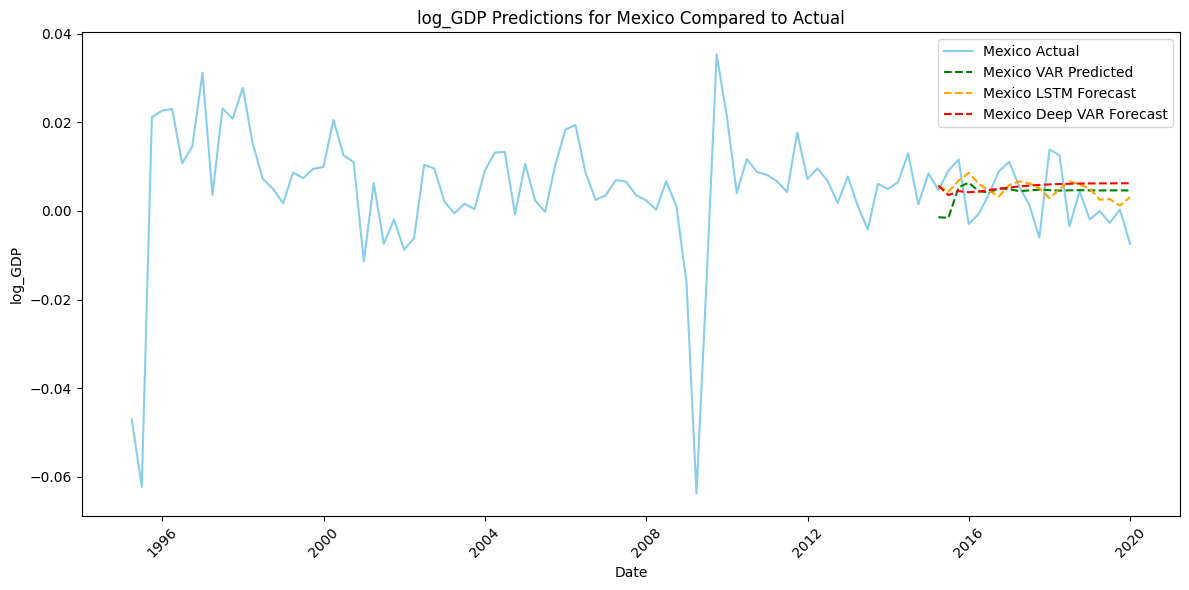

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


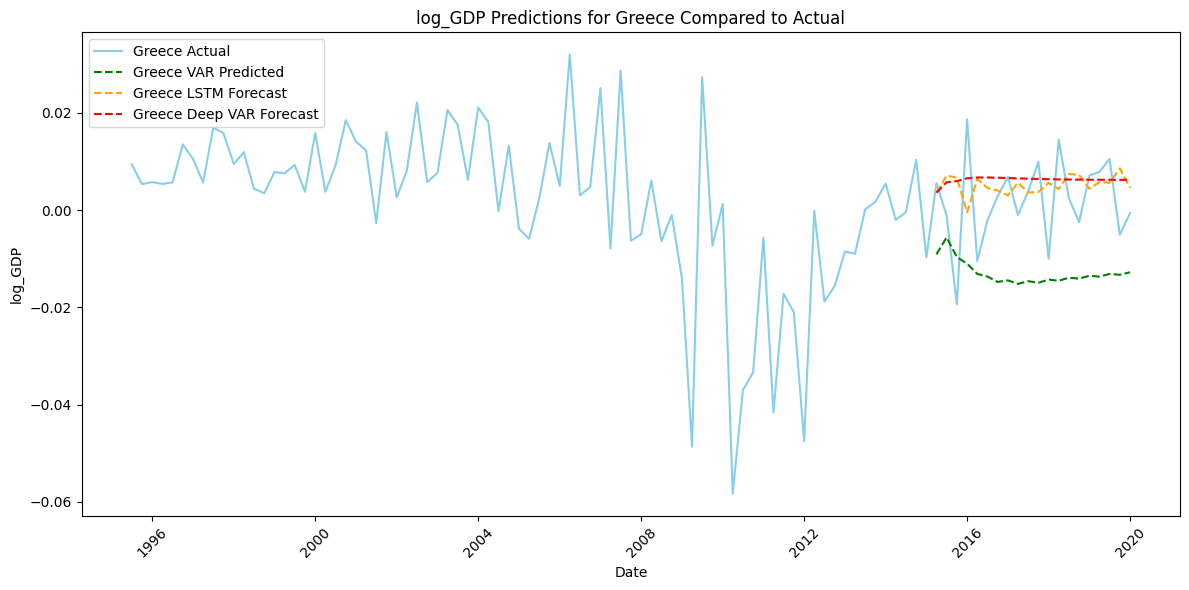

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


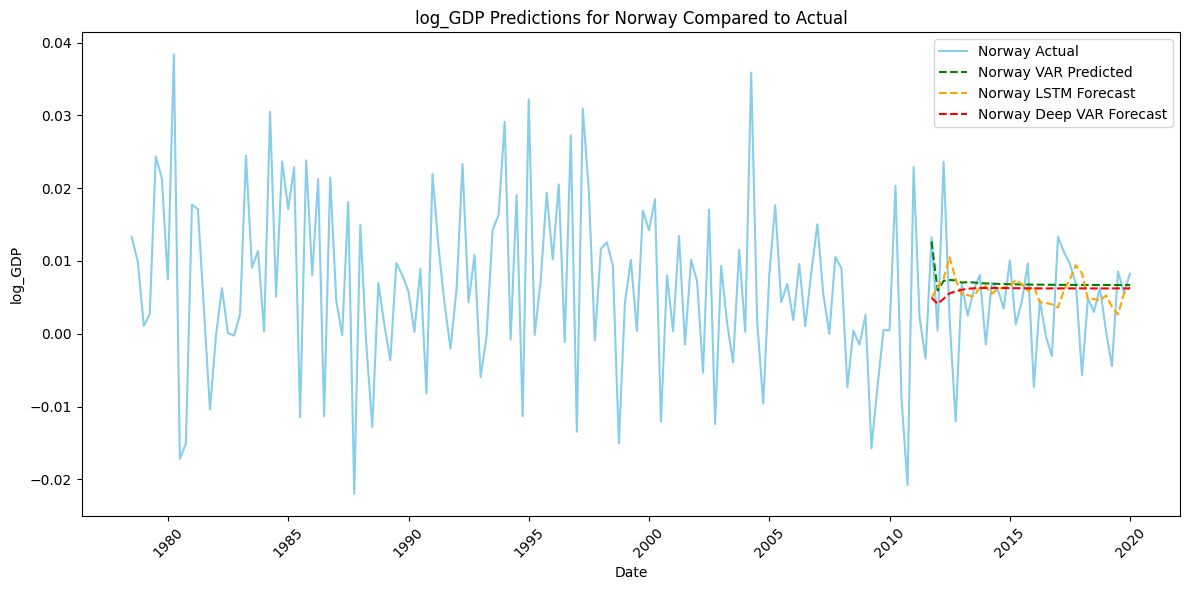

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


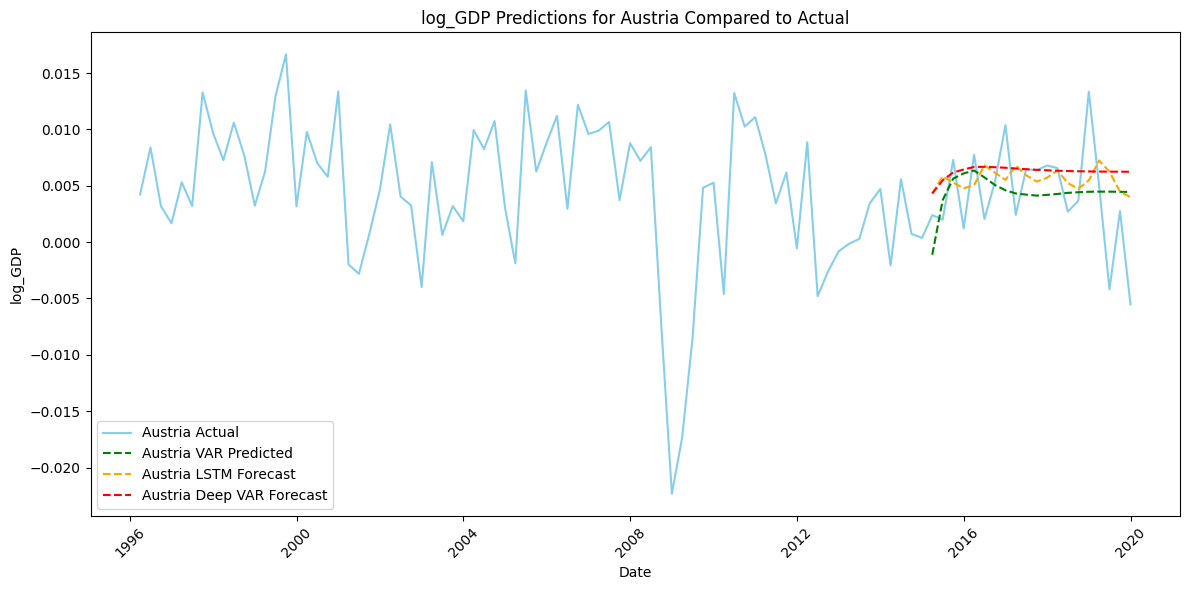

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


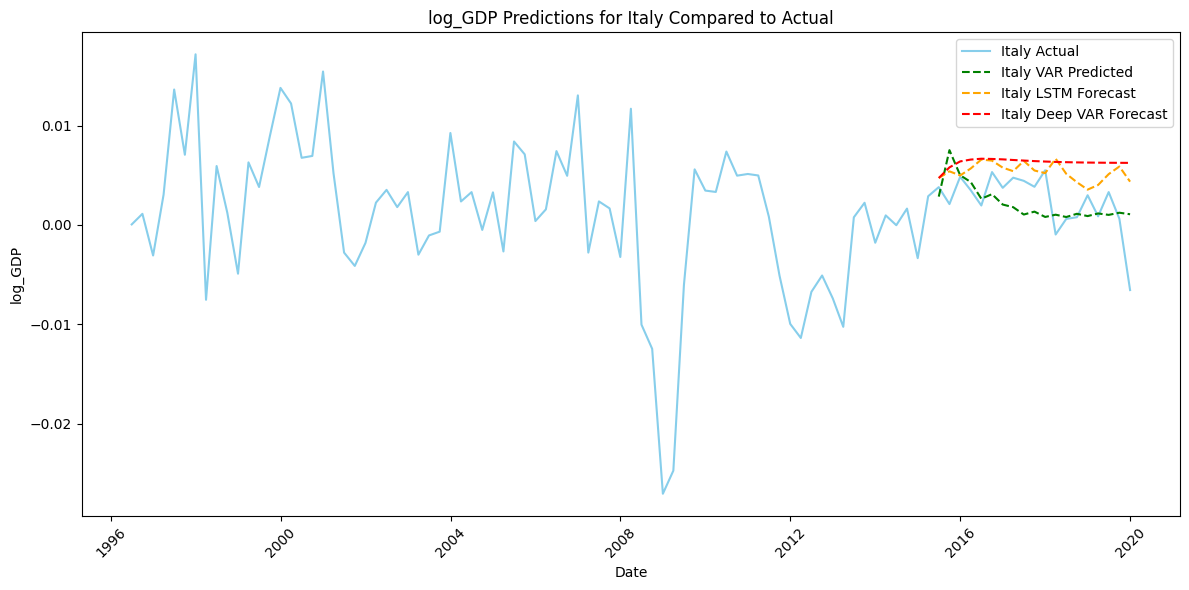

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


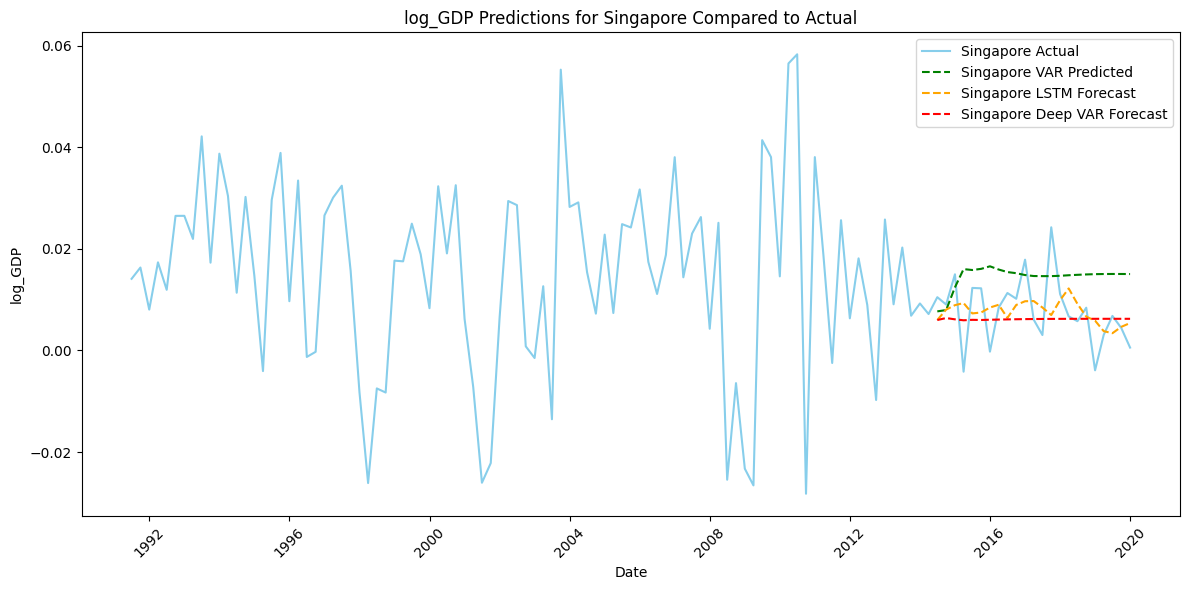

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


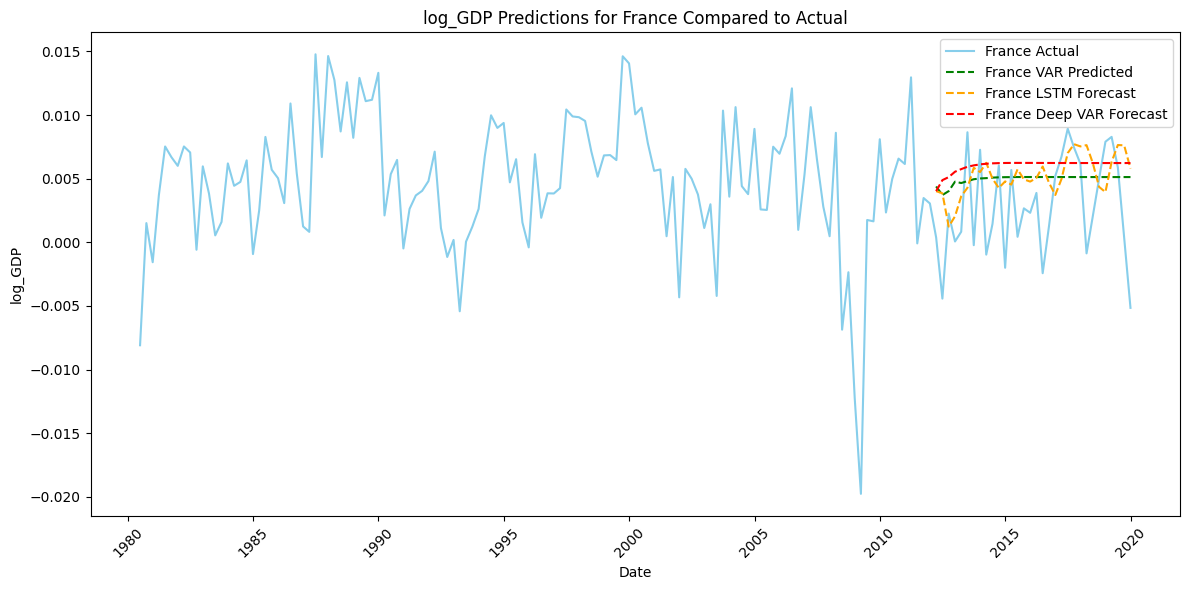

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


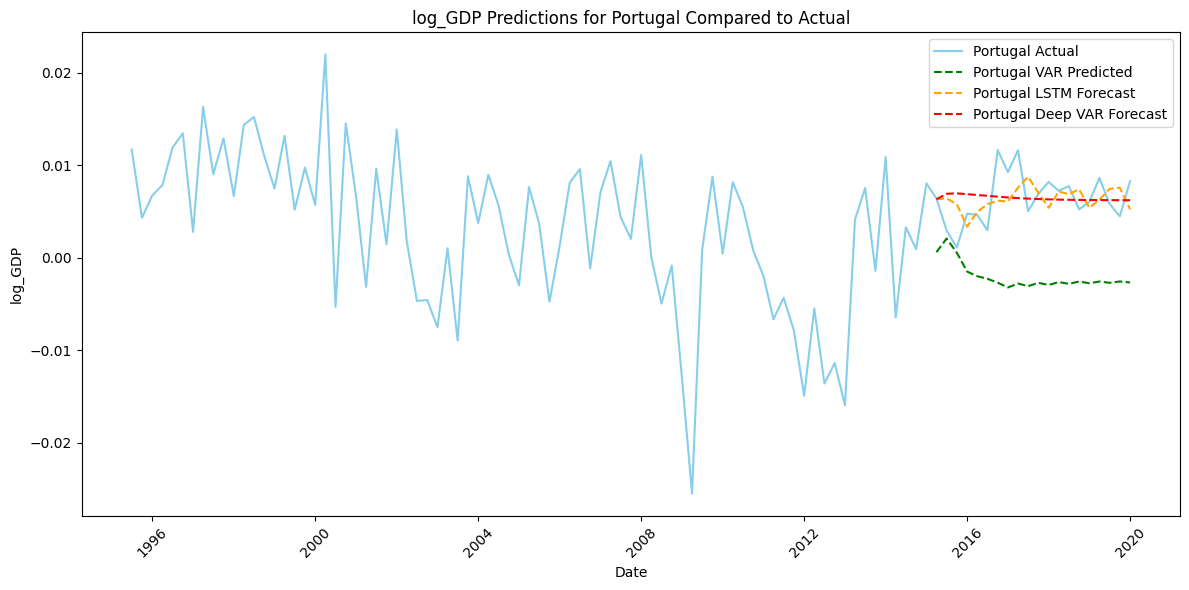

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


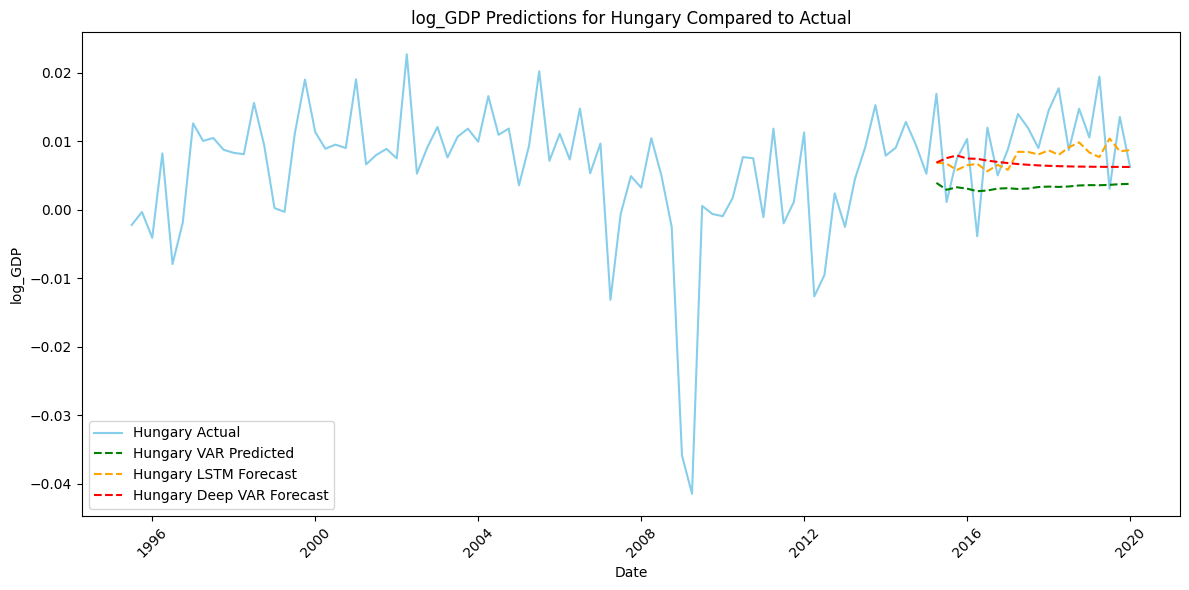

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


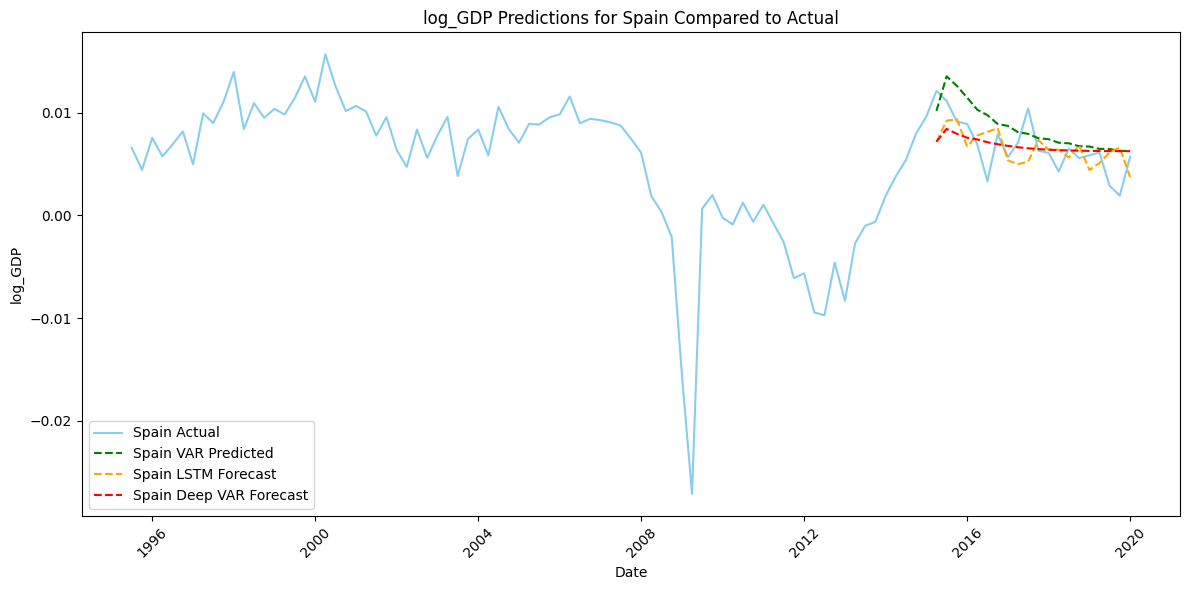

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


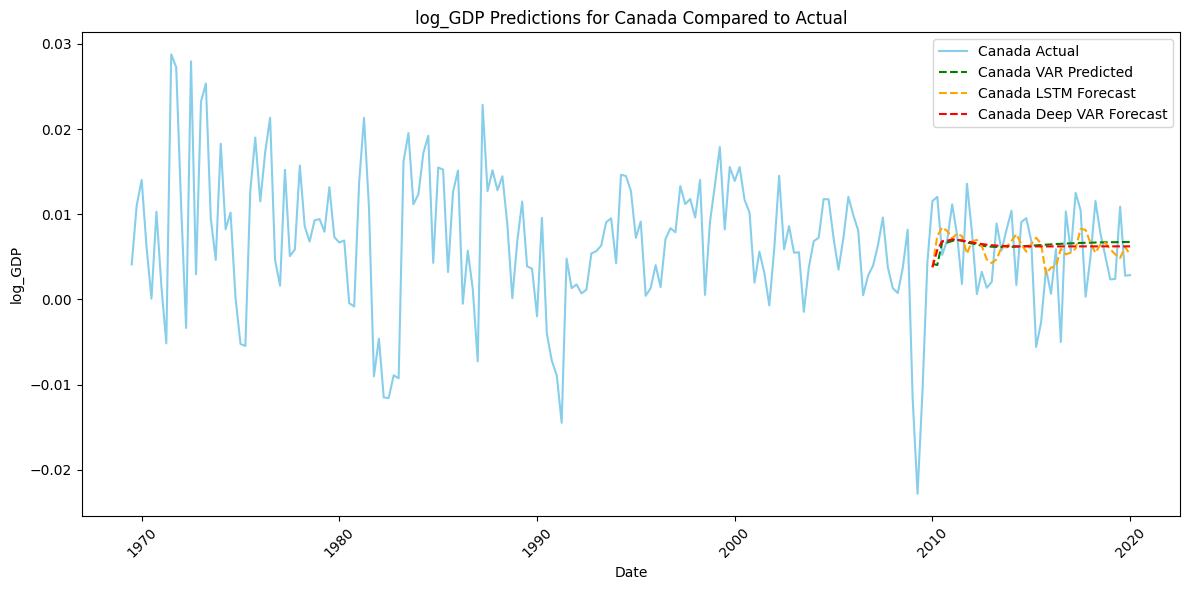

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


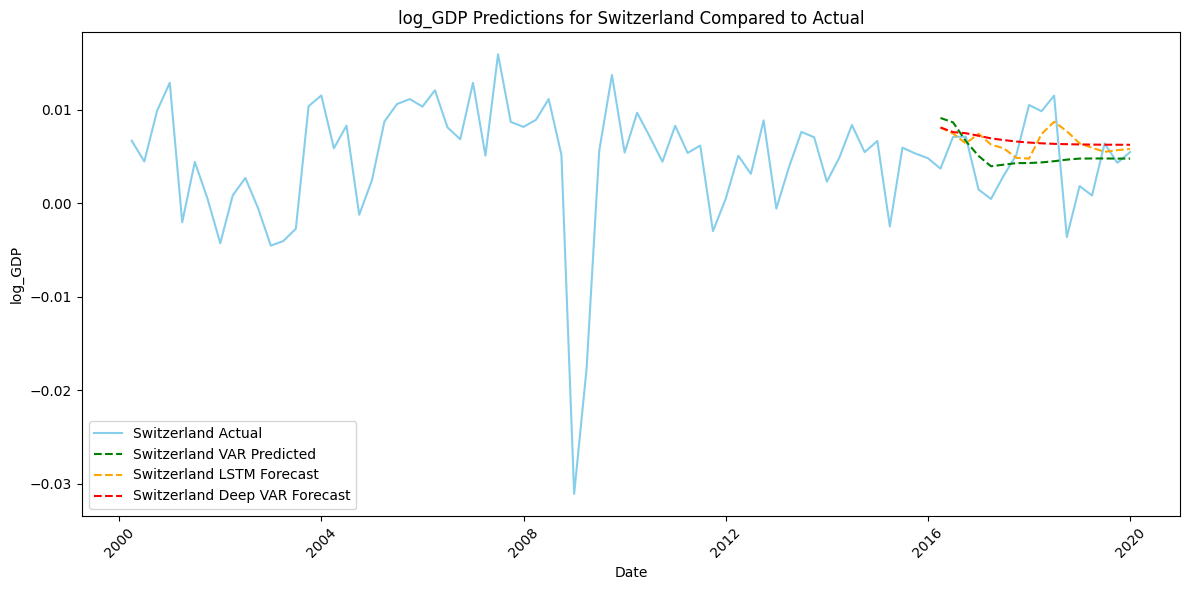

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


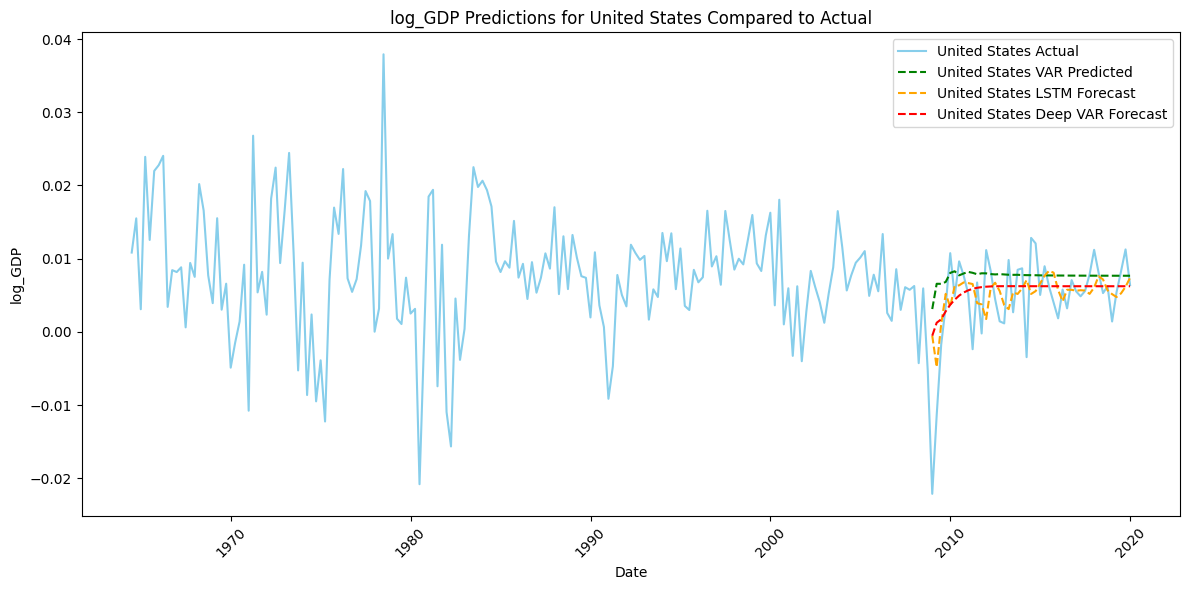

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


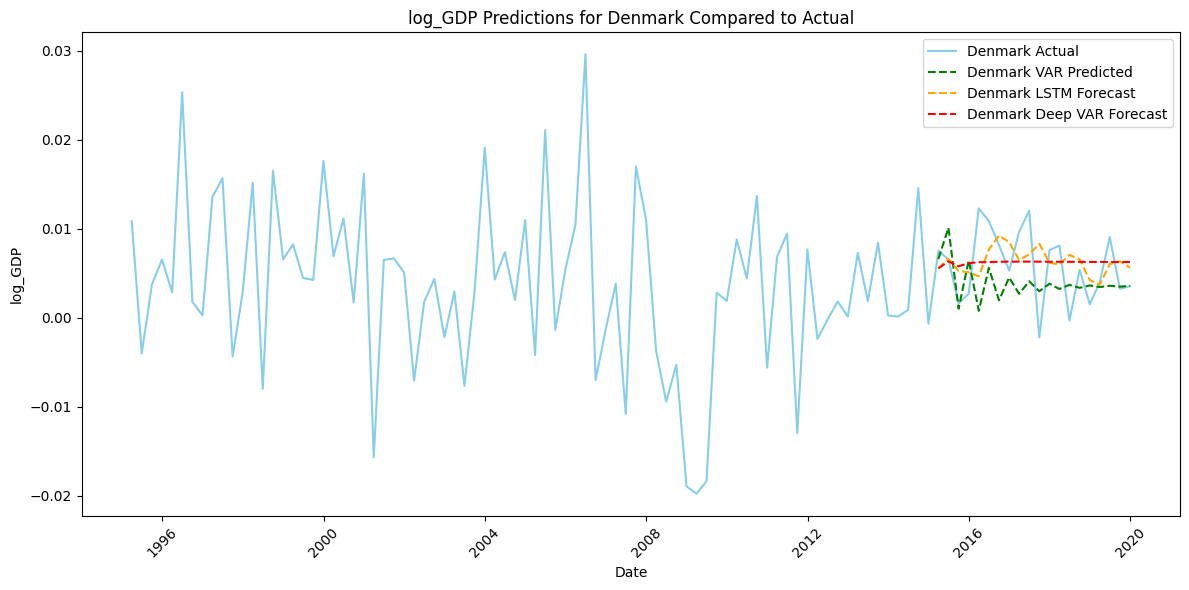

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


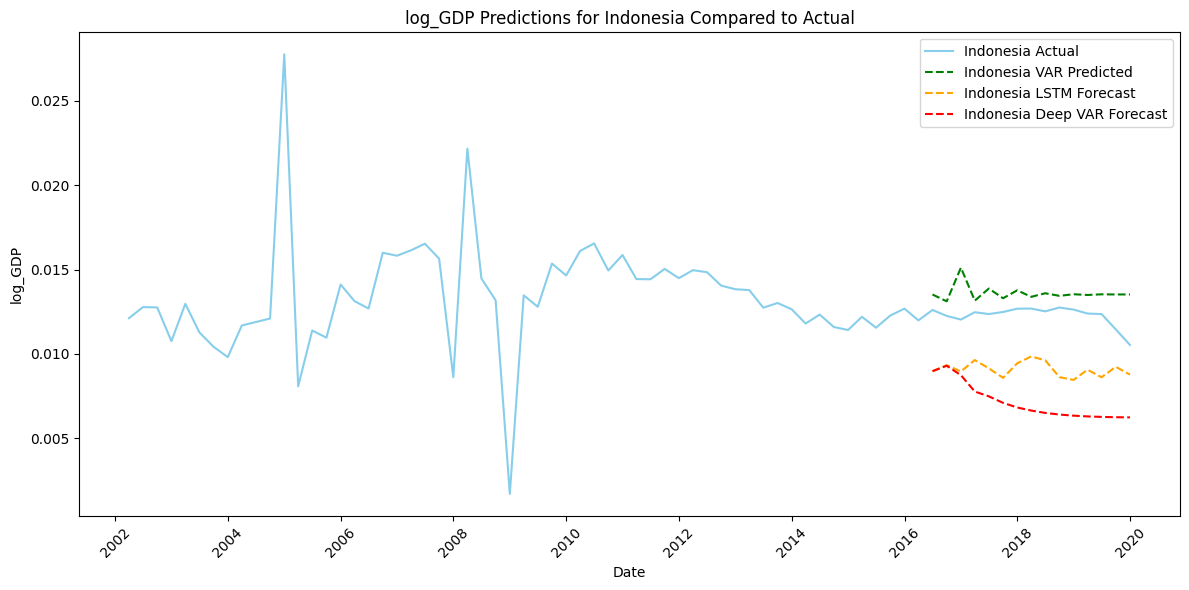

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


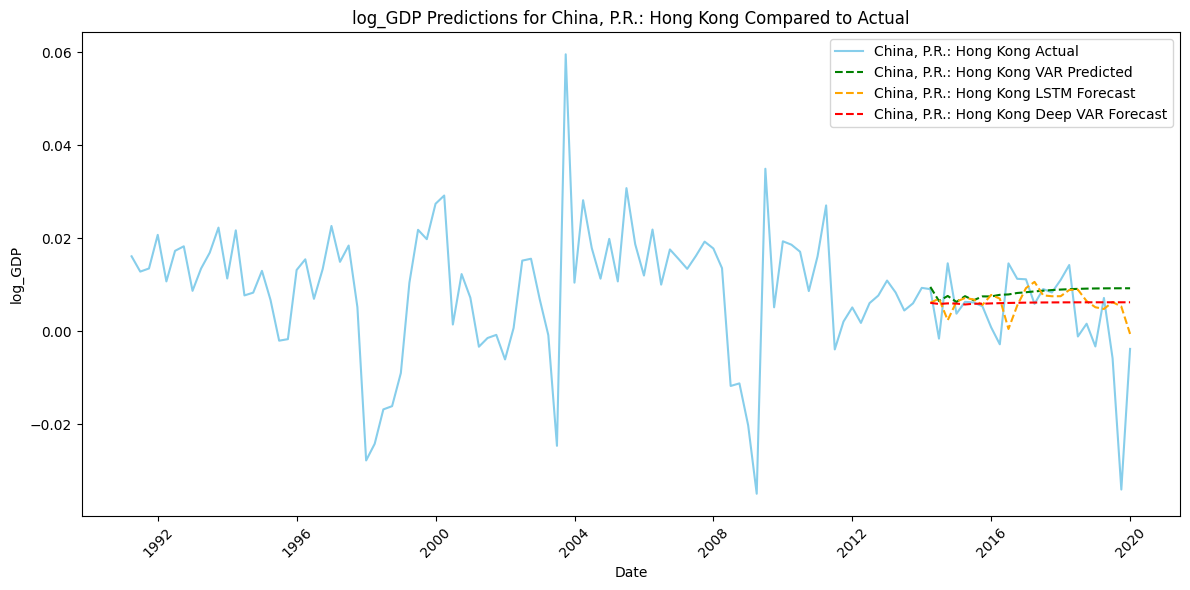

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


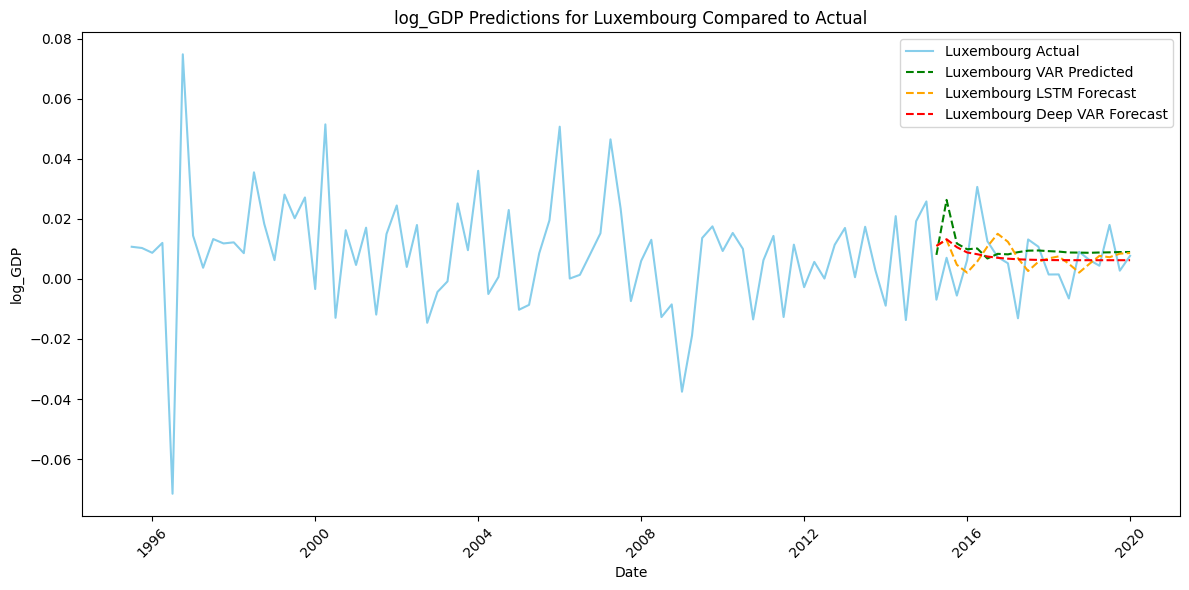

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


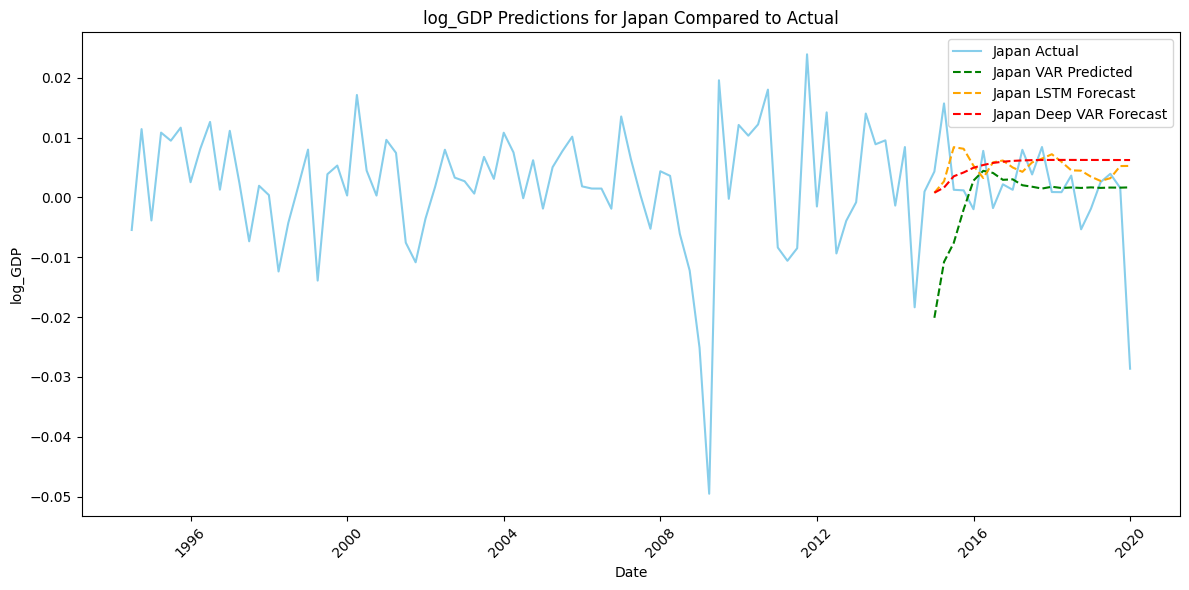

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


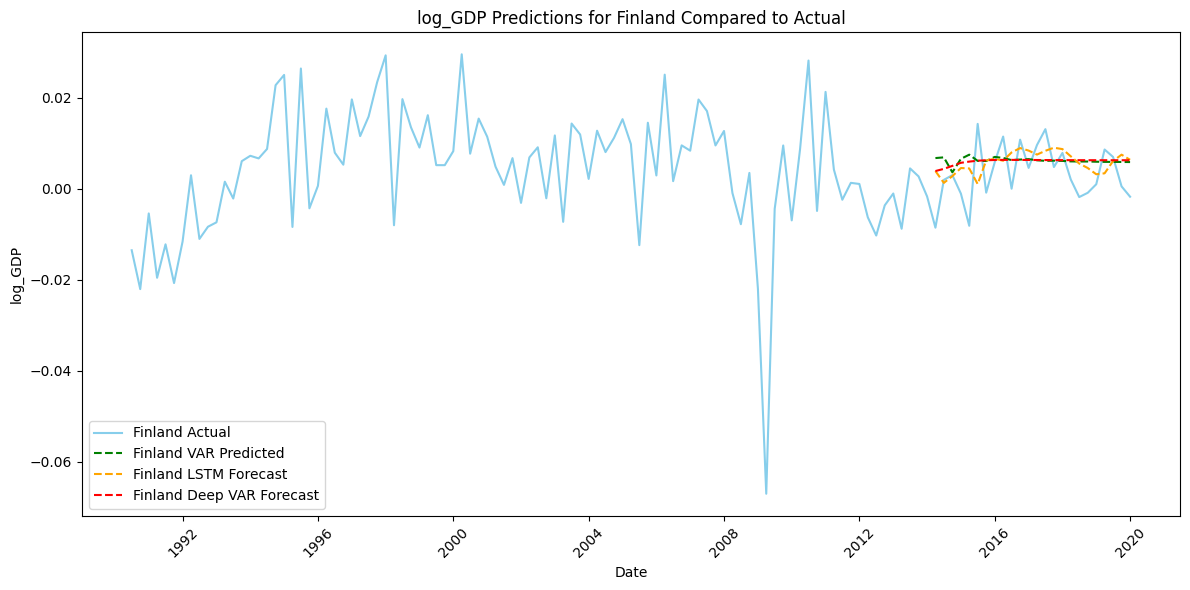

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


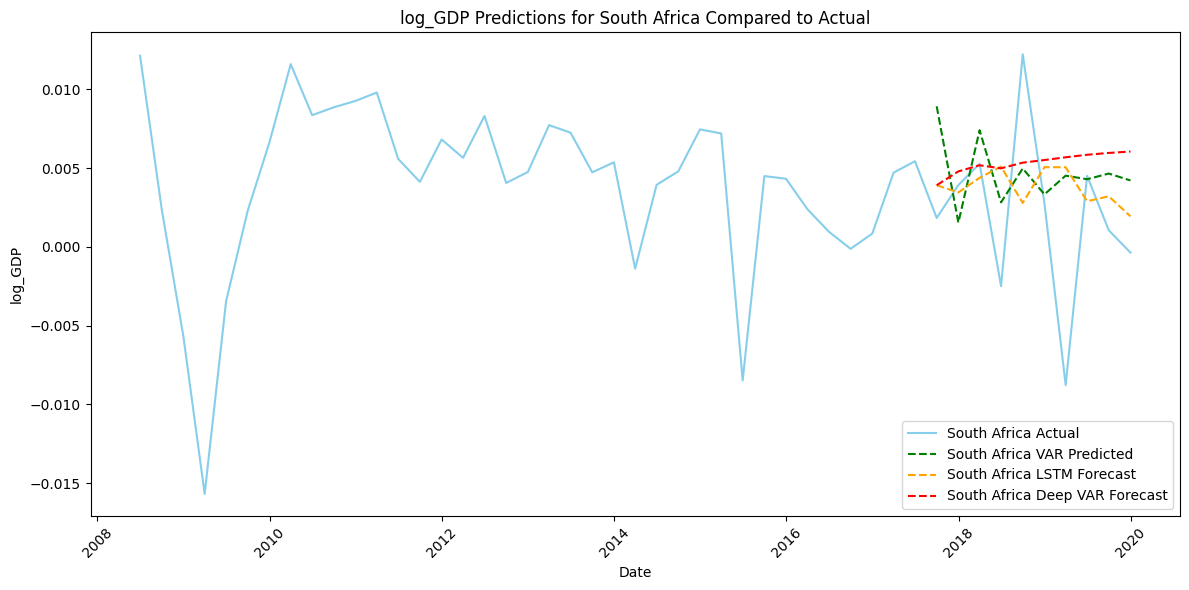

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


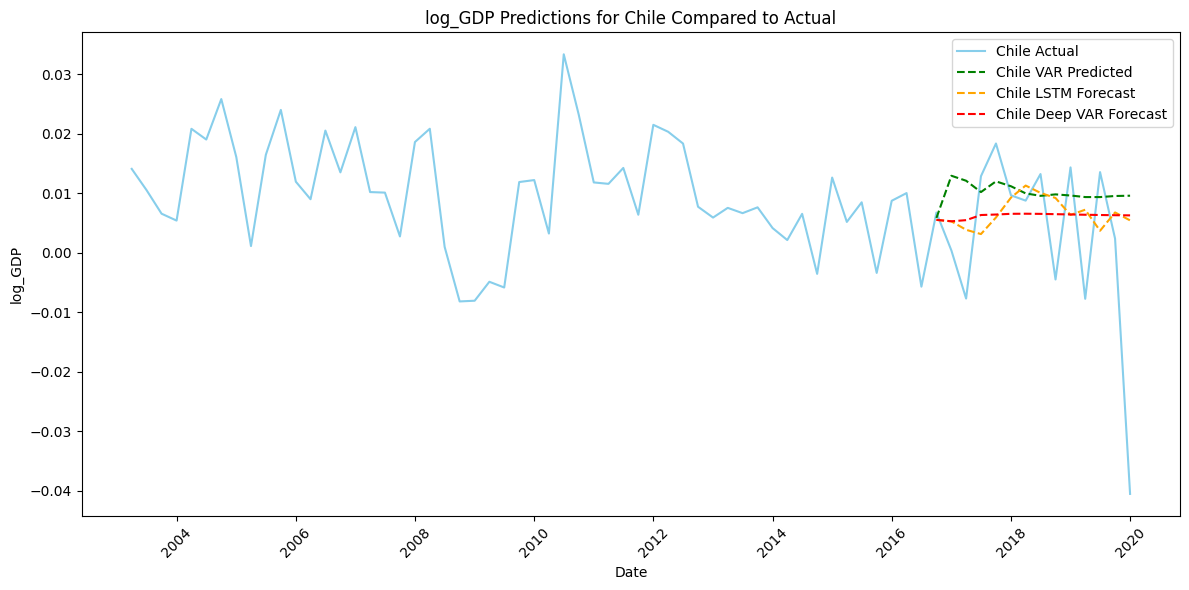

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


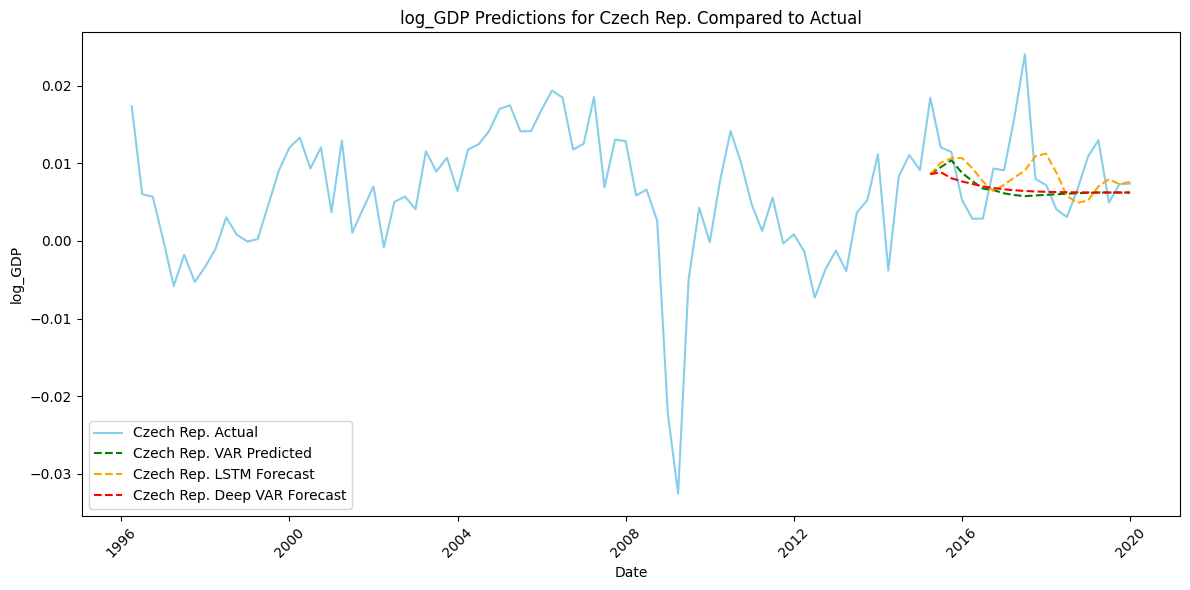

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


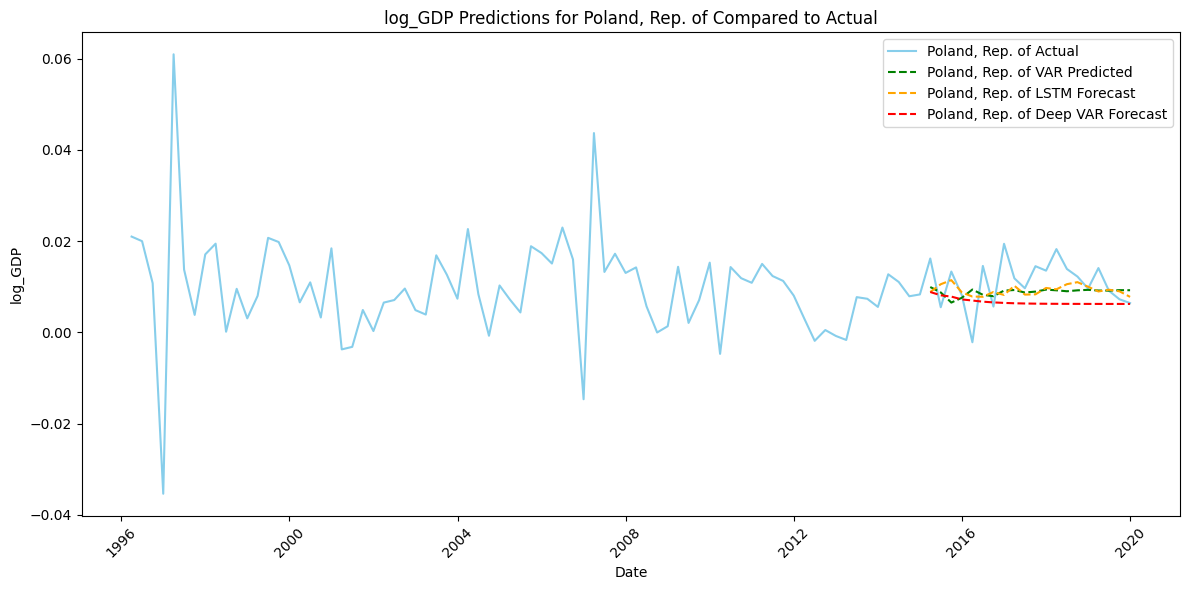

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


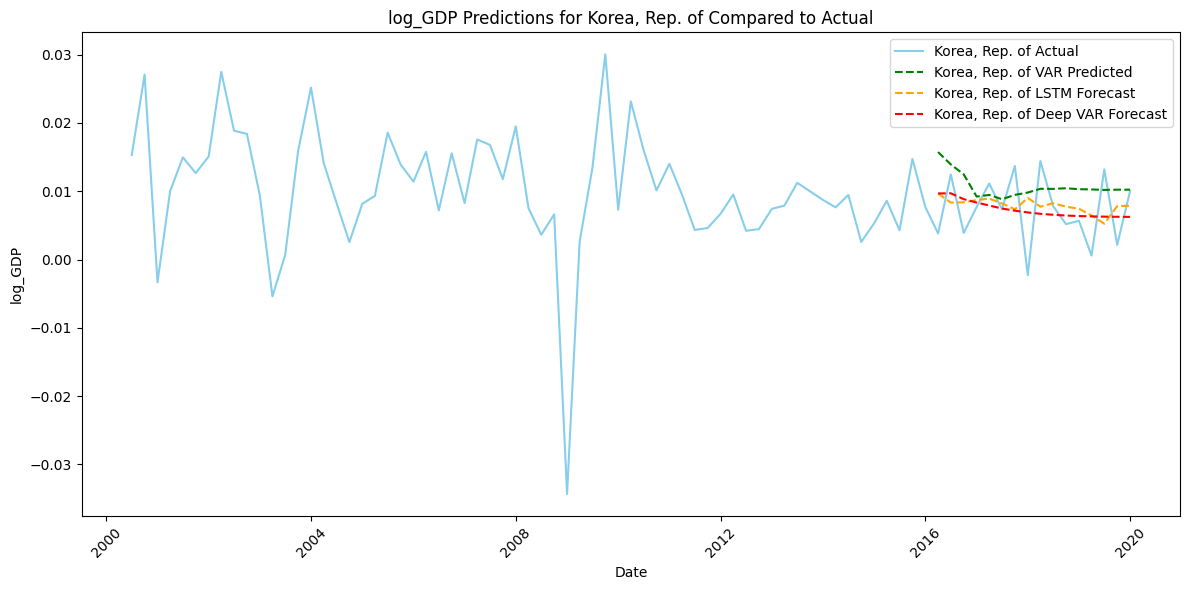

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
Seed set to 18


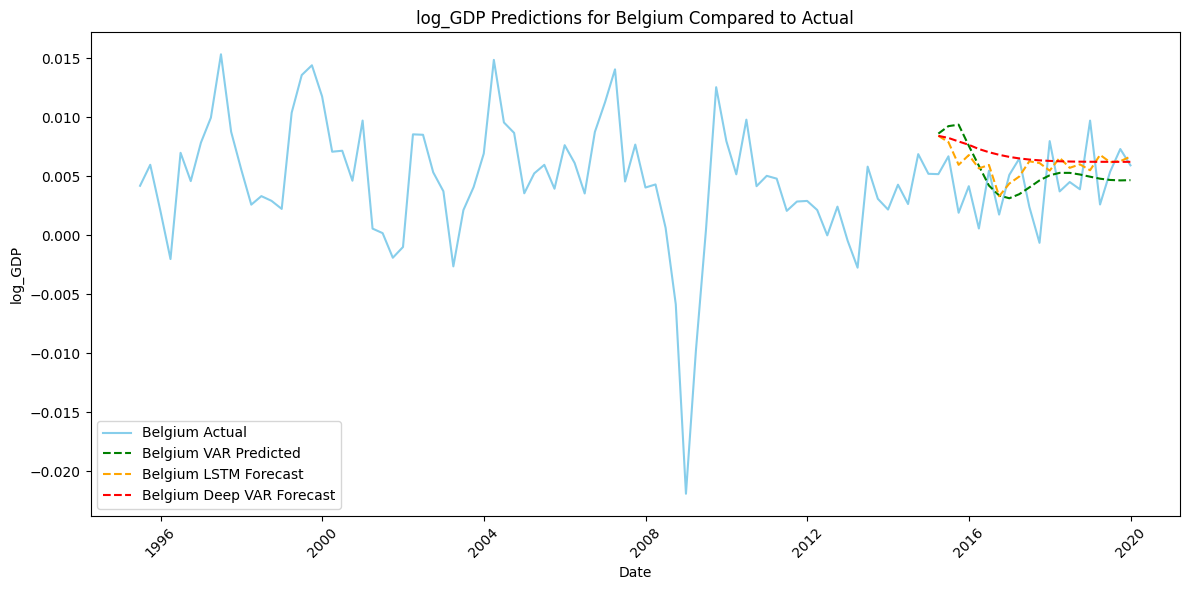

In [45]:
countries = ['Colombia', 'Netherlands, The', 'United Kingdom', 'India', 'Israel',
       'Sweden', 'Thailand', 'Australia', 'New Zealand', 'Germany', 'Brazil',
       'Mexico', 'Greece', 'Norway', 'Austria', 'Italy', 'Singapore', 'France',
       'Portugal', 'Hungary', 'Spain', 'Canada', 'Switzerland',
       'United States', 'Denmark', 'Indonesia', 'China, P.R.: Hong Kong',
       'Luxembourg', 'Japan', 'Finland', 'South Africa', 'Chile', 'Czech Rep.',
       'Poland, Rep. of', 'Korea, Rep. of', 'Belgium']

inputsvar = final_detrend_nopr.columns

for country in countries:
       # pr.plot_country_comparison(country, 'log_GDP', inputs_nopr, inputsvar, 3, final_detrend_nopr, all_lstm_data_nopr, model_scaler_dict)
       pr.plot_country_predictions_test(country, 'log_GDP', inputs_nopr, 3, all_lstm_data_nopr, model_scaler_dict, train_dt_var_nopr, test_dt_var_nopr, final_detrend_nopr)

## Appendix


In [46]:
# Test to ensure that detrending is 
# plt.figure(figsize = (12,9))
# plt.plot(df[df['Country']=='Colombia'].index, test1['Household debt'], label = 'Test')
# plt.plot(df[df['Country']=='Colombia'].index, df[df['Country']=='Colombia']['Household debt'], label = 'Real', color = 'orange')
# plt.plot(df_detrended[df_detrended['Country']=='Norway'].index, df_detrended[df_detrended['Country']=='Norway']['log_GDP'], label = 'Real', color = 'skyblue')

In [47]:
# Testing the model on other data. 

# Look into how it is determining the outcomes. Look at techniques. What part of the data is it looking at. 

In [48]:
final_detrend_nopr.describe()

summary_stats = final_detrend_nopr.describe().transpose()

latex_table = summary_stats.to_latex(float_format="%.5f")
print(latex_table)

\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
log_GDP & 3844.00000 & 0.00639 & 0.01036 & -0.07151 & 0.00166 & 0.00676 & 0.01147 & 0.08968 \\
log_hhd & 3844.00000 & 0.00670 & 0.02298 & -0.32190 & -0.00345 & 0.00490 & 0.01455 & 0.33647 \\
log_pd & 3844.00000 & 0.00335 & 0.02521 & -0.13544 & -0.00984 & 0.00242 & 0.01512 & 0.16742 \\
log_CPI & 3844.00000 & 0.00758 & 0.01038 & -0.03516 & 0.00171 & 0.00586 & 0.01163 & 0.16602 \\
\bottomrule
\end{tabular}



In [49]:
df_zeros = pd.DataFrame(np.zeros((1, 12)), columns=['log_pd_lag1', 'log_pd_lag2', 'log_pd_lag3','log_hhd_lag1', 'log_hhd_lag2', 'log_hhd_lag3','log_CPI_lag1', 'log_CPI_lag2', 'log_CPI_lag3', 'log_GDP_lag1', 'log_GDP_lag2','log_GDP_lag3'])


Small Change in Household debt % change effect on GDP

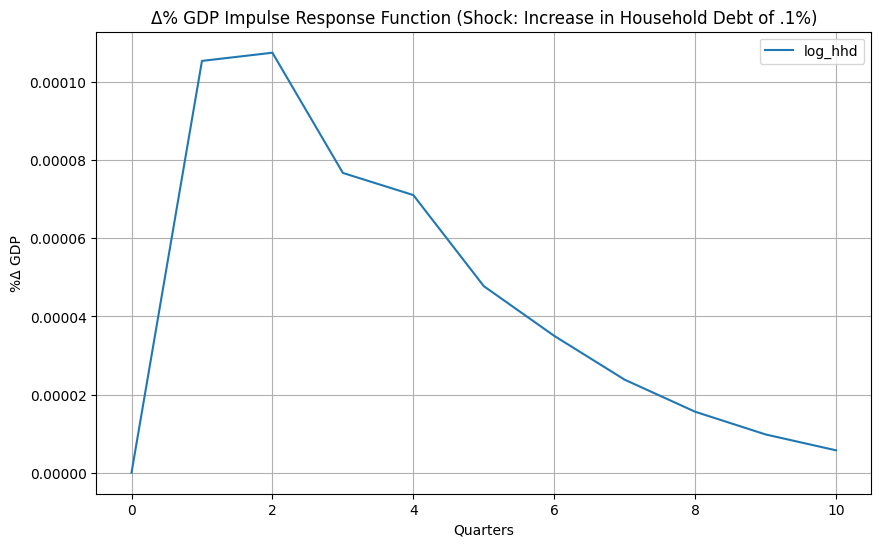

In [50]:
plot1_irf_results = irf.predict(df_zeros, inputs_nopr, 'log_hhd_lag1', .0016, 'log_GDP', 10, model_scaler_dict)
plot1_title = 'Δ% GDP Impulse Response Function (Shock: Increase in Household Debt of .1%)'
plot1_var = '%Δ GDP'
irf.plot(plot1_irf_results, 'log_hhd', plot1_title, plot1_var)

Average Change in Household debt % change effect on GDP

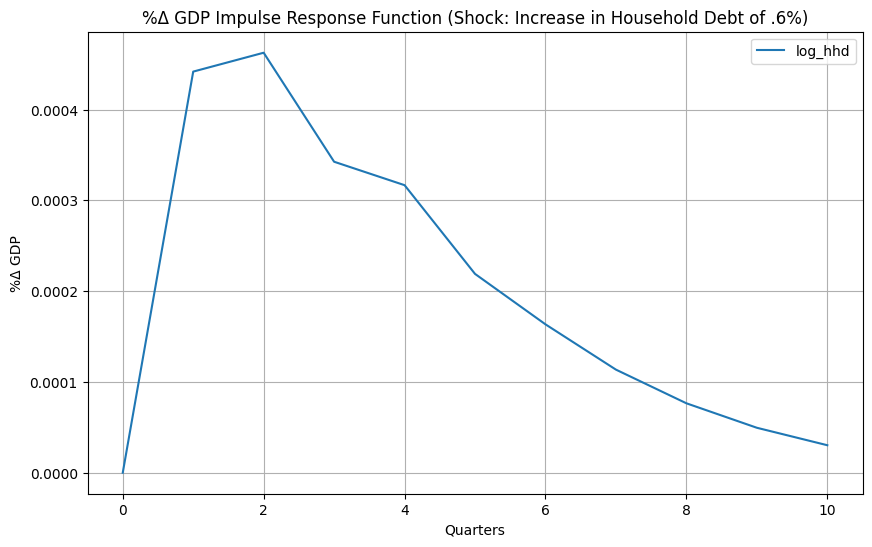

In [51]:
plot2_irf_results = irf.predict(df_zeros, inputs_nopr, 'log_hhd_lag1', .00676, 'log_GDP', 10, model_scaler_dict)
plot2_title = '%Δ GDP Impulse Response Function (Shock: Increase in Household Debt of .6%)'
plot2_var = '%Δ GDP'
irf.plot(plot2_irf_results, 'log_hhd', plot2_title, plot2_var)

Large Change in Household debt % change effect on GDP

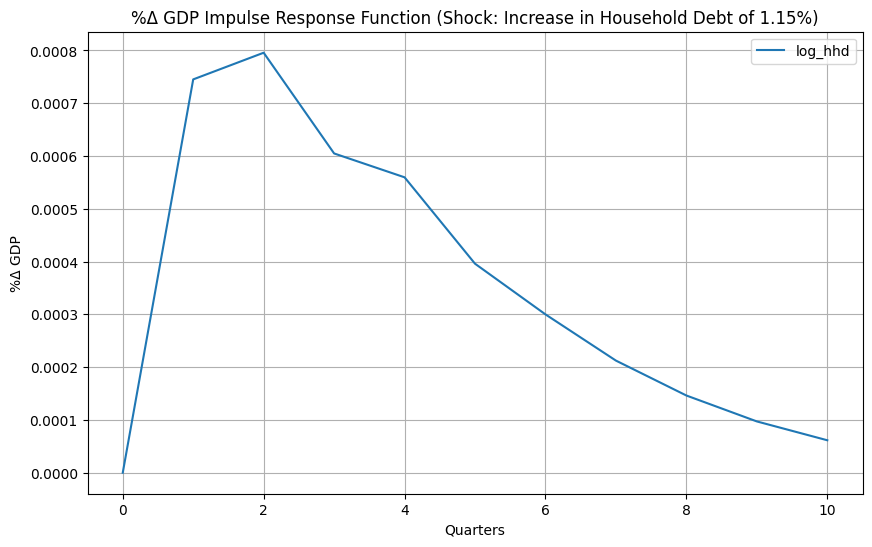

In [52]:
plot3_irf_results = irf.predict(df_zeros, inputs_nopr, 'log_hhd_lag1', .0115, 'log_GDP', 10, model_scaler_dict)
plot3_title = '%Δ GDP Impulse Response Function (Shock: Increase in Household Debt of 1.15%)'
plot3_var = '%Δ GDP'


irf.plot(plot3_irf_results, 'log_hhd', plot3_title, plot3_var)

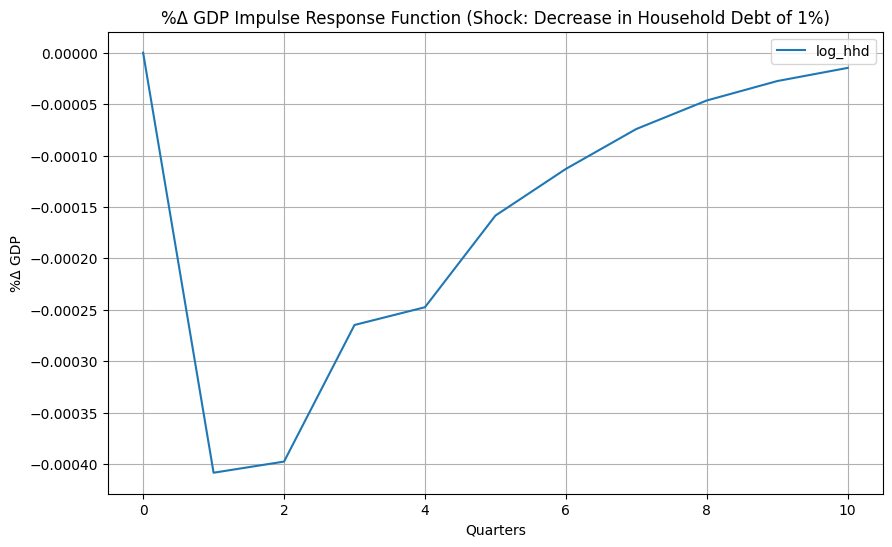

In [53]:
plot4_irf_results = irf.predict(df_zeros, inputs_nopr, 'log_hhd_lag1', -.00615, 'log_GDP', 10, model_scaler_dict)
plot4_title = '%Δ GDP Impulse Response Function (Shock: Decrease in Household Debt of 1%)'
plot4_var = '%Δ GDP'


irf.plot(plot4_irf_results, 'log_hhd', plot4_title, plot4_var)

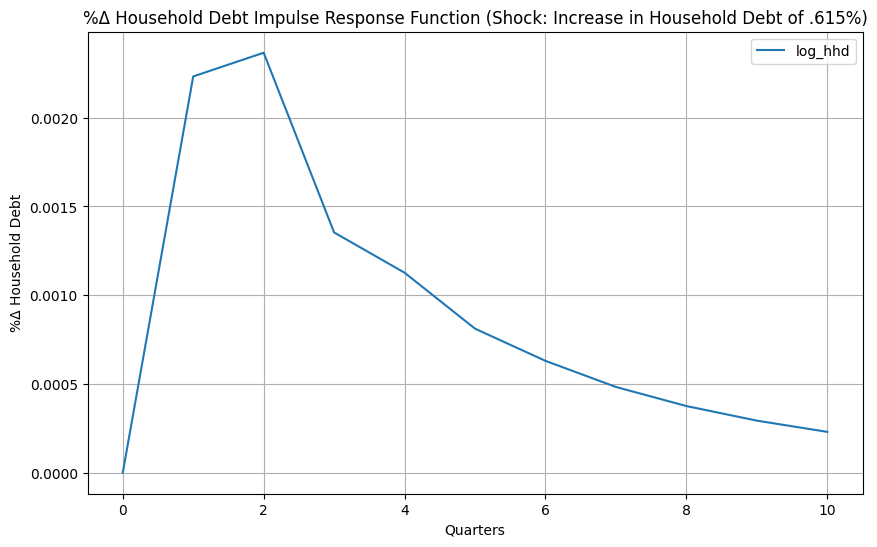

In [54]:
plot5_irf_results = irf.predict(df_zeros, inputs_nopr, 'log_hhd_lag1', .00615, 'log_hhd', 10, model_scaler_dict)
plot5_title = '%Δ Household Debt Impulse Response Function (Shock: Increase in Household Debt of .615%)'
plot5_var = '%Δ Household Debt'


irf.plot(plot5_irf_results, 'log_hhd', plot5_title, plot5_var)

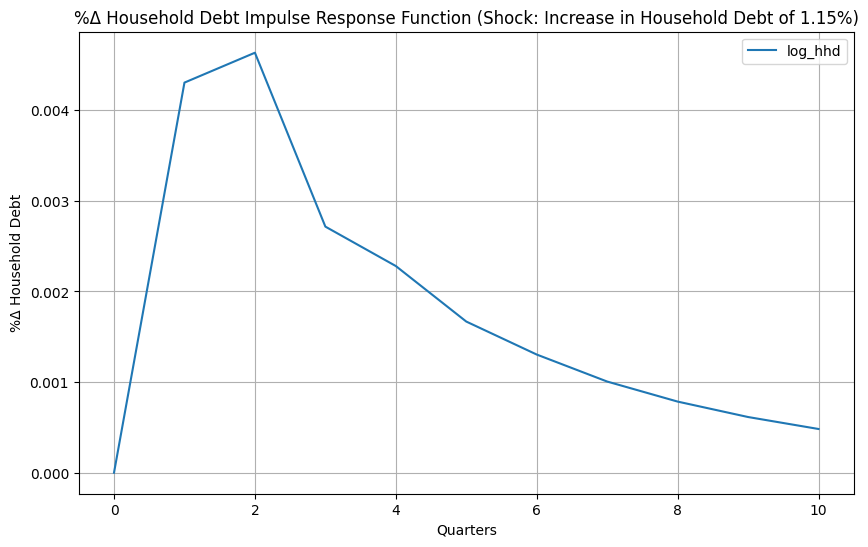

In [55]:
plot6_irf_results = irf.predict(df_zeros, inputs_nopr, 'log_hhd_lag1', .0115, 'log_hhd', 10, model_scaler_dict)
plot6_title = '%Δ Household Debt Impulse Response Function (Shock: Increase in Household Debt of 1.15%)'
plot6_var = '%Δ Household Debt'


irf.plot(plot6_irf_results, 'log_hhd', plot6_title, plot6_var)

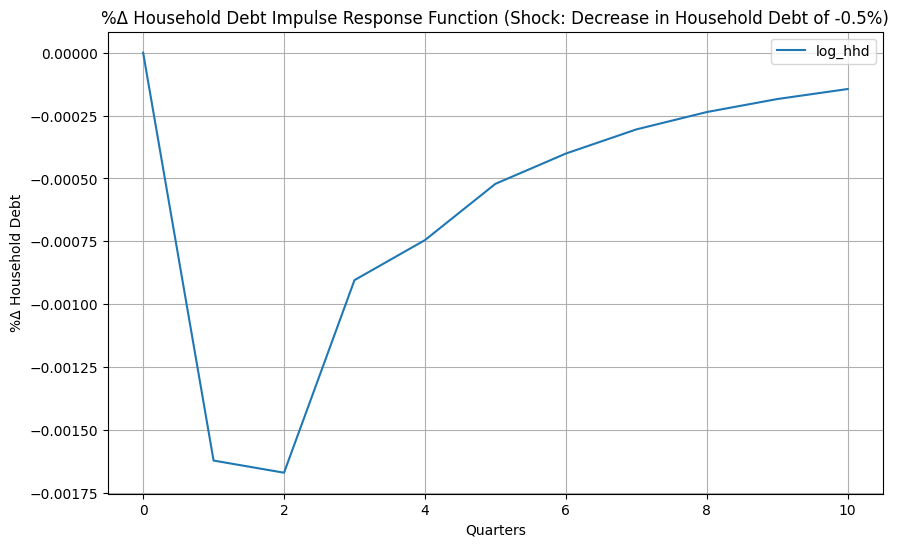

In [56]:
plot6_irf_results = irf.predict(df_zeros, inputs_nopr, 'log_hhd_lag1', -.005, 'log_hhd', 10, model_scaler_dict)
plot6_title = '%Δ Household Debt Impulse Response Function (Shock: Decrease in Household Debt of -0.5%)'
plot6_var = '%Δ Household Debt'


irf.plot(plot6_irf_results, 'log_hhd', plot6_title, plot6_var)

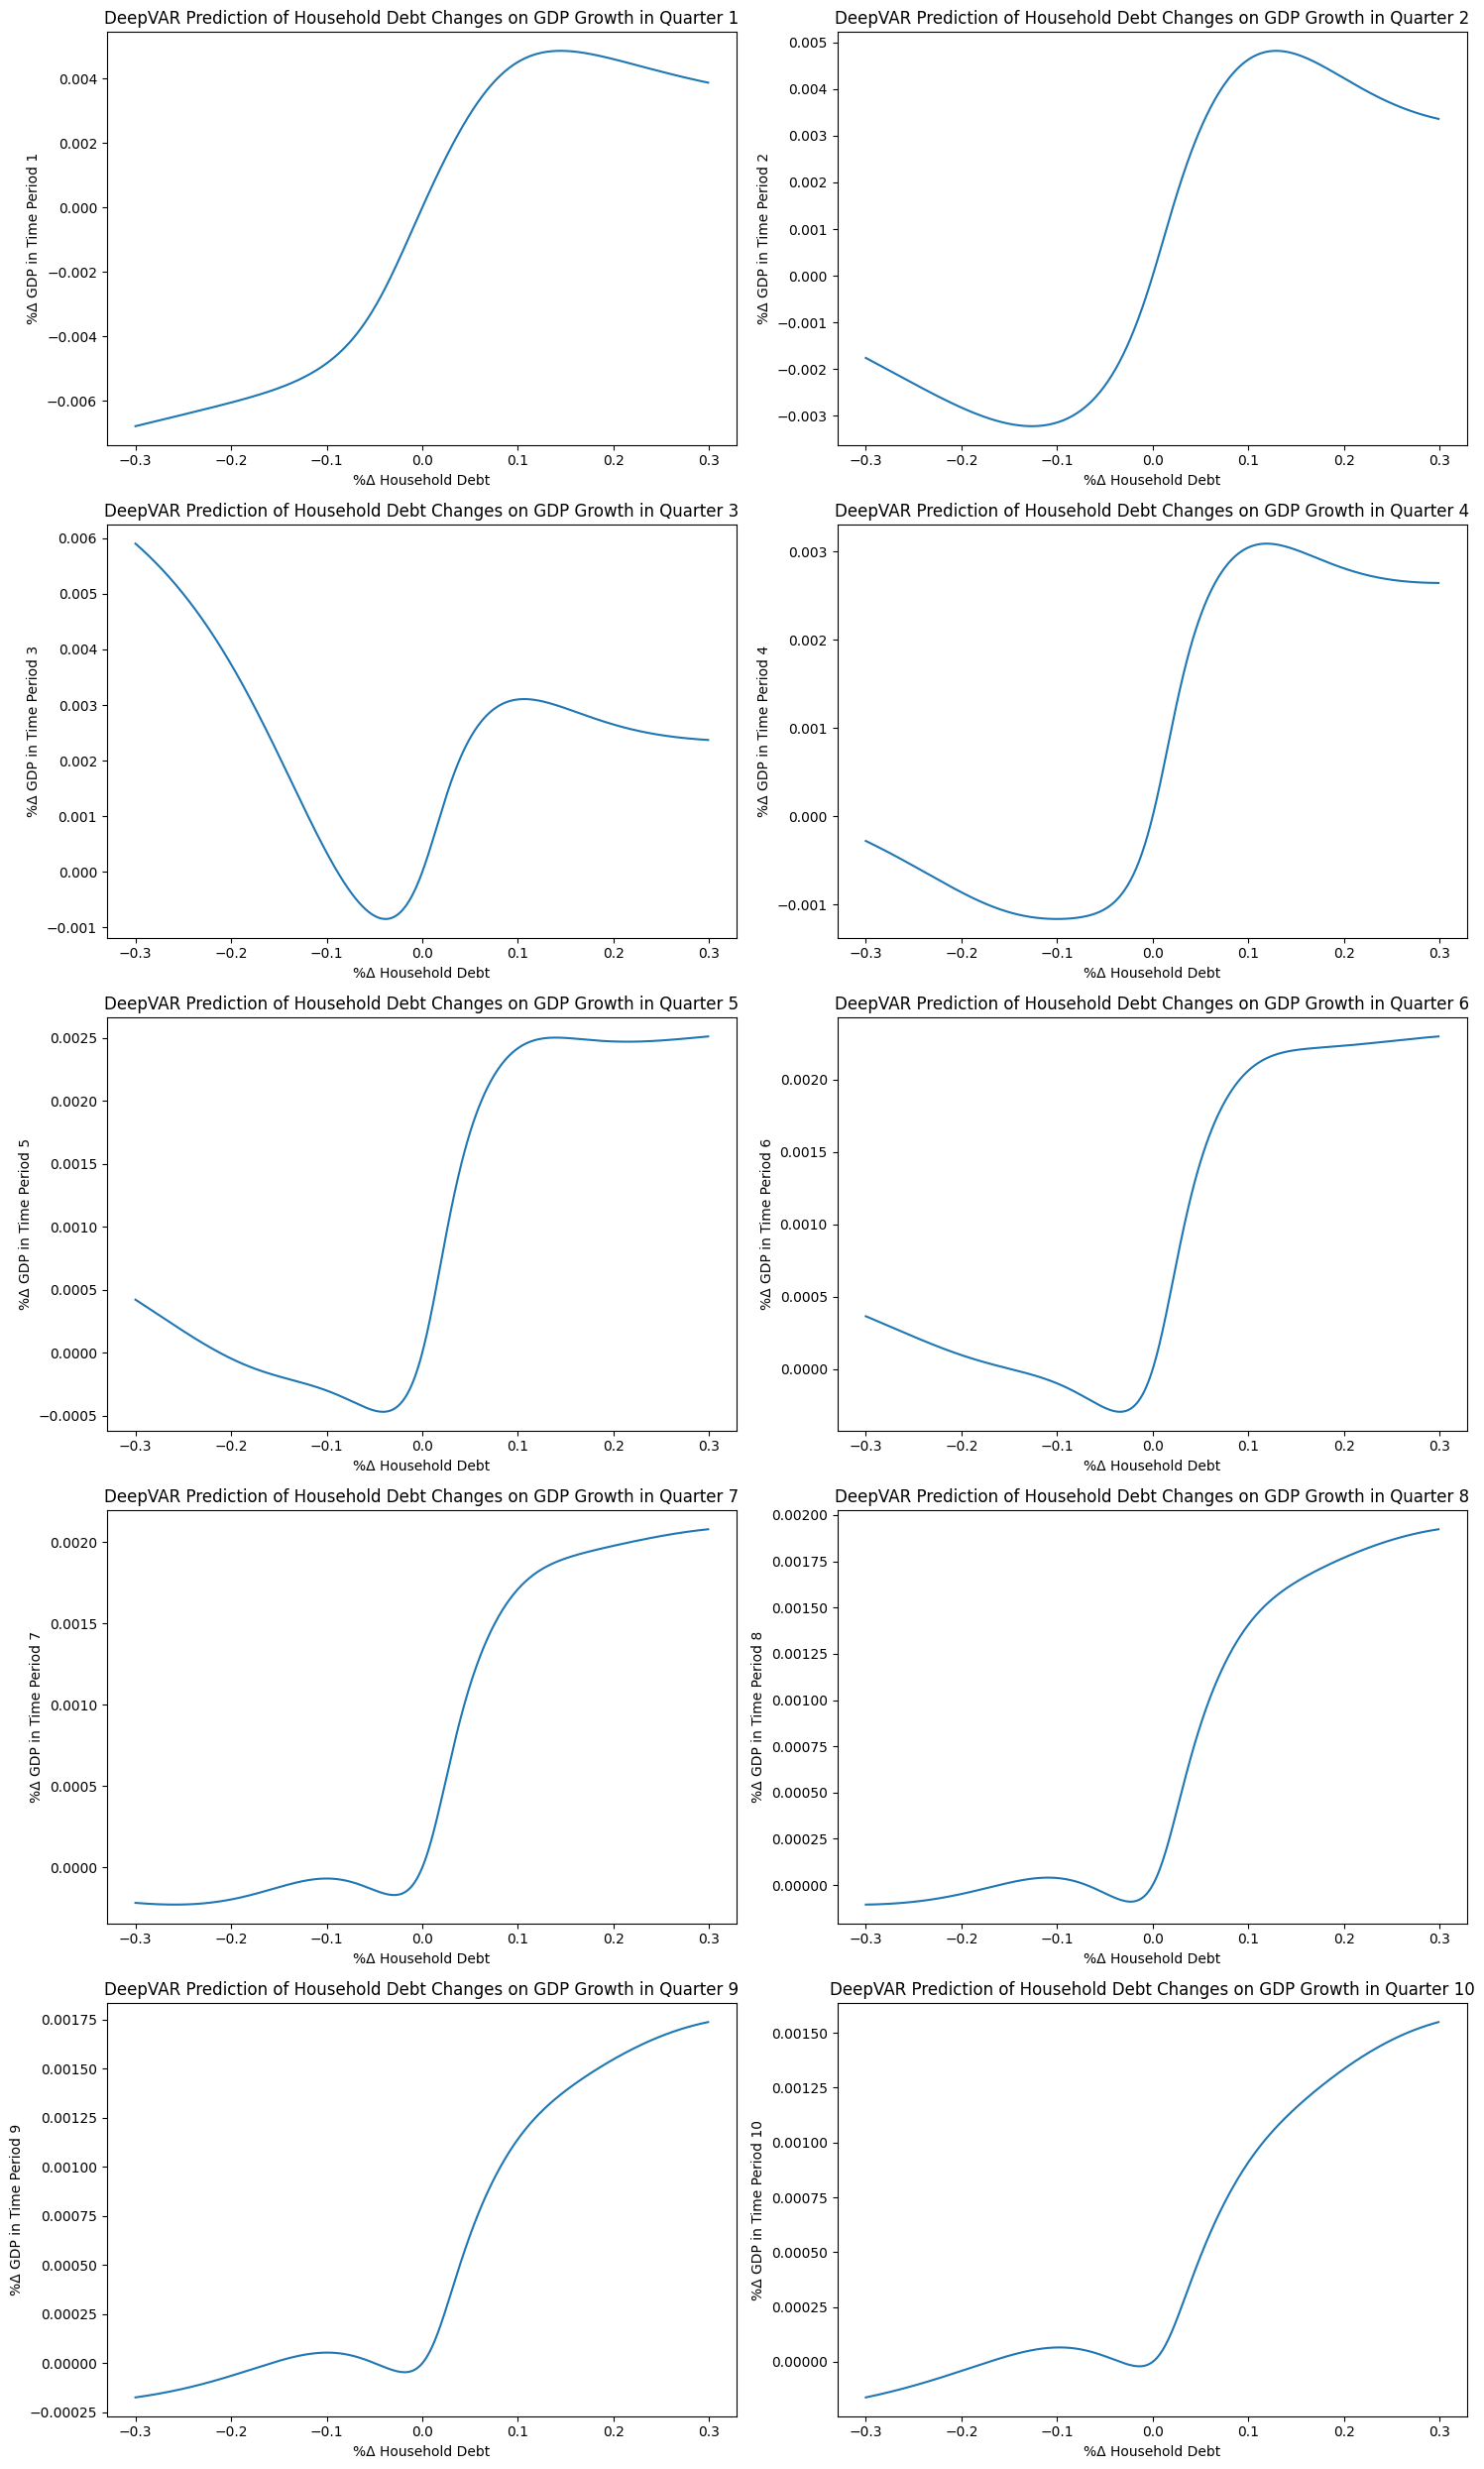

In [57]:
onesteppredictions = []
twosteppredictions = []
threesteppredictions = []
foursteppredictions = []
fivesteppredictions = []
sixsteppredictions = []
sevensteppredictions = []
eightsteppredictions = []
ninesteppredictions = []
tensteppredictions = []
index = []
for num in np.arange(-.3,.3, 0.001):
    prediction = irf.predict(df_zeros, inputs_nopr, 'log_hhd_lag1', num, 'log_GDP', 10, model_scaler_dict)
    # irf begins at 0 
    onesteppredictions.append(prediction[1])
    twosteppredictions.append(prediction[2])
    threesteppredictions.append(prediction[3])
    foursteppredictions.append(prediction[4])
    fivesteppredictions.append(prediction[5])
    sixsteppredictions.append(prediction[6])
    sevensteppredictions.append(prediction[7])
    eightsteppredictions.append(prediction[8])
    ninesteppredictions.append(prediction[9])
    tensteppredictions.append(prediction[10])
    index.append(num)



fig, axs = plt.subplots(5, 2, figsize=(15, 25))  # 5x2 grid of subplots
axs = axs.ravel()  # Flatten the 2D array of axes for easier indexing

predictions_list = [onesteppredictions, twosteppredictions, threesteppredictions, 
                   foursteppredictions, fivesteppredictions, sixsteppredictions,
                   sevensteppredictions, eightsteppredictions, ninesteppredictions,
                   tensteppredictions]

for i in range(10):
    axs[i].plot(index, predictions_list[i])
    axs[i].set_xlabel("%Δ Household Debt")
    axs[i].set_ylabel(f"%Δ GDP in Time Period {i+1}")
    axs[i].set_title(f"DeepVAR Prediction of Household Debt Changes on GDP Growth in Quarter {i+1}")

plt.tight_layout() 
plt.show()

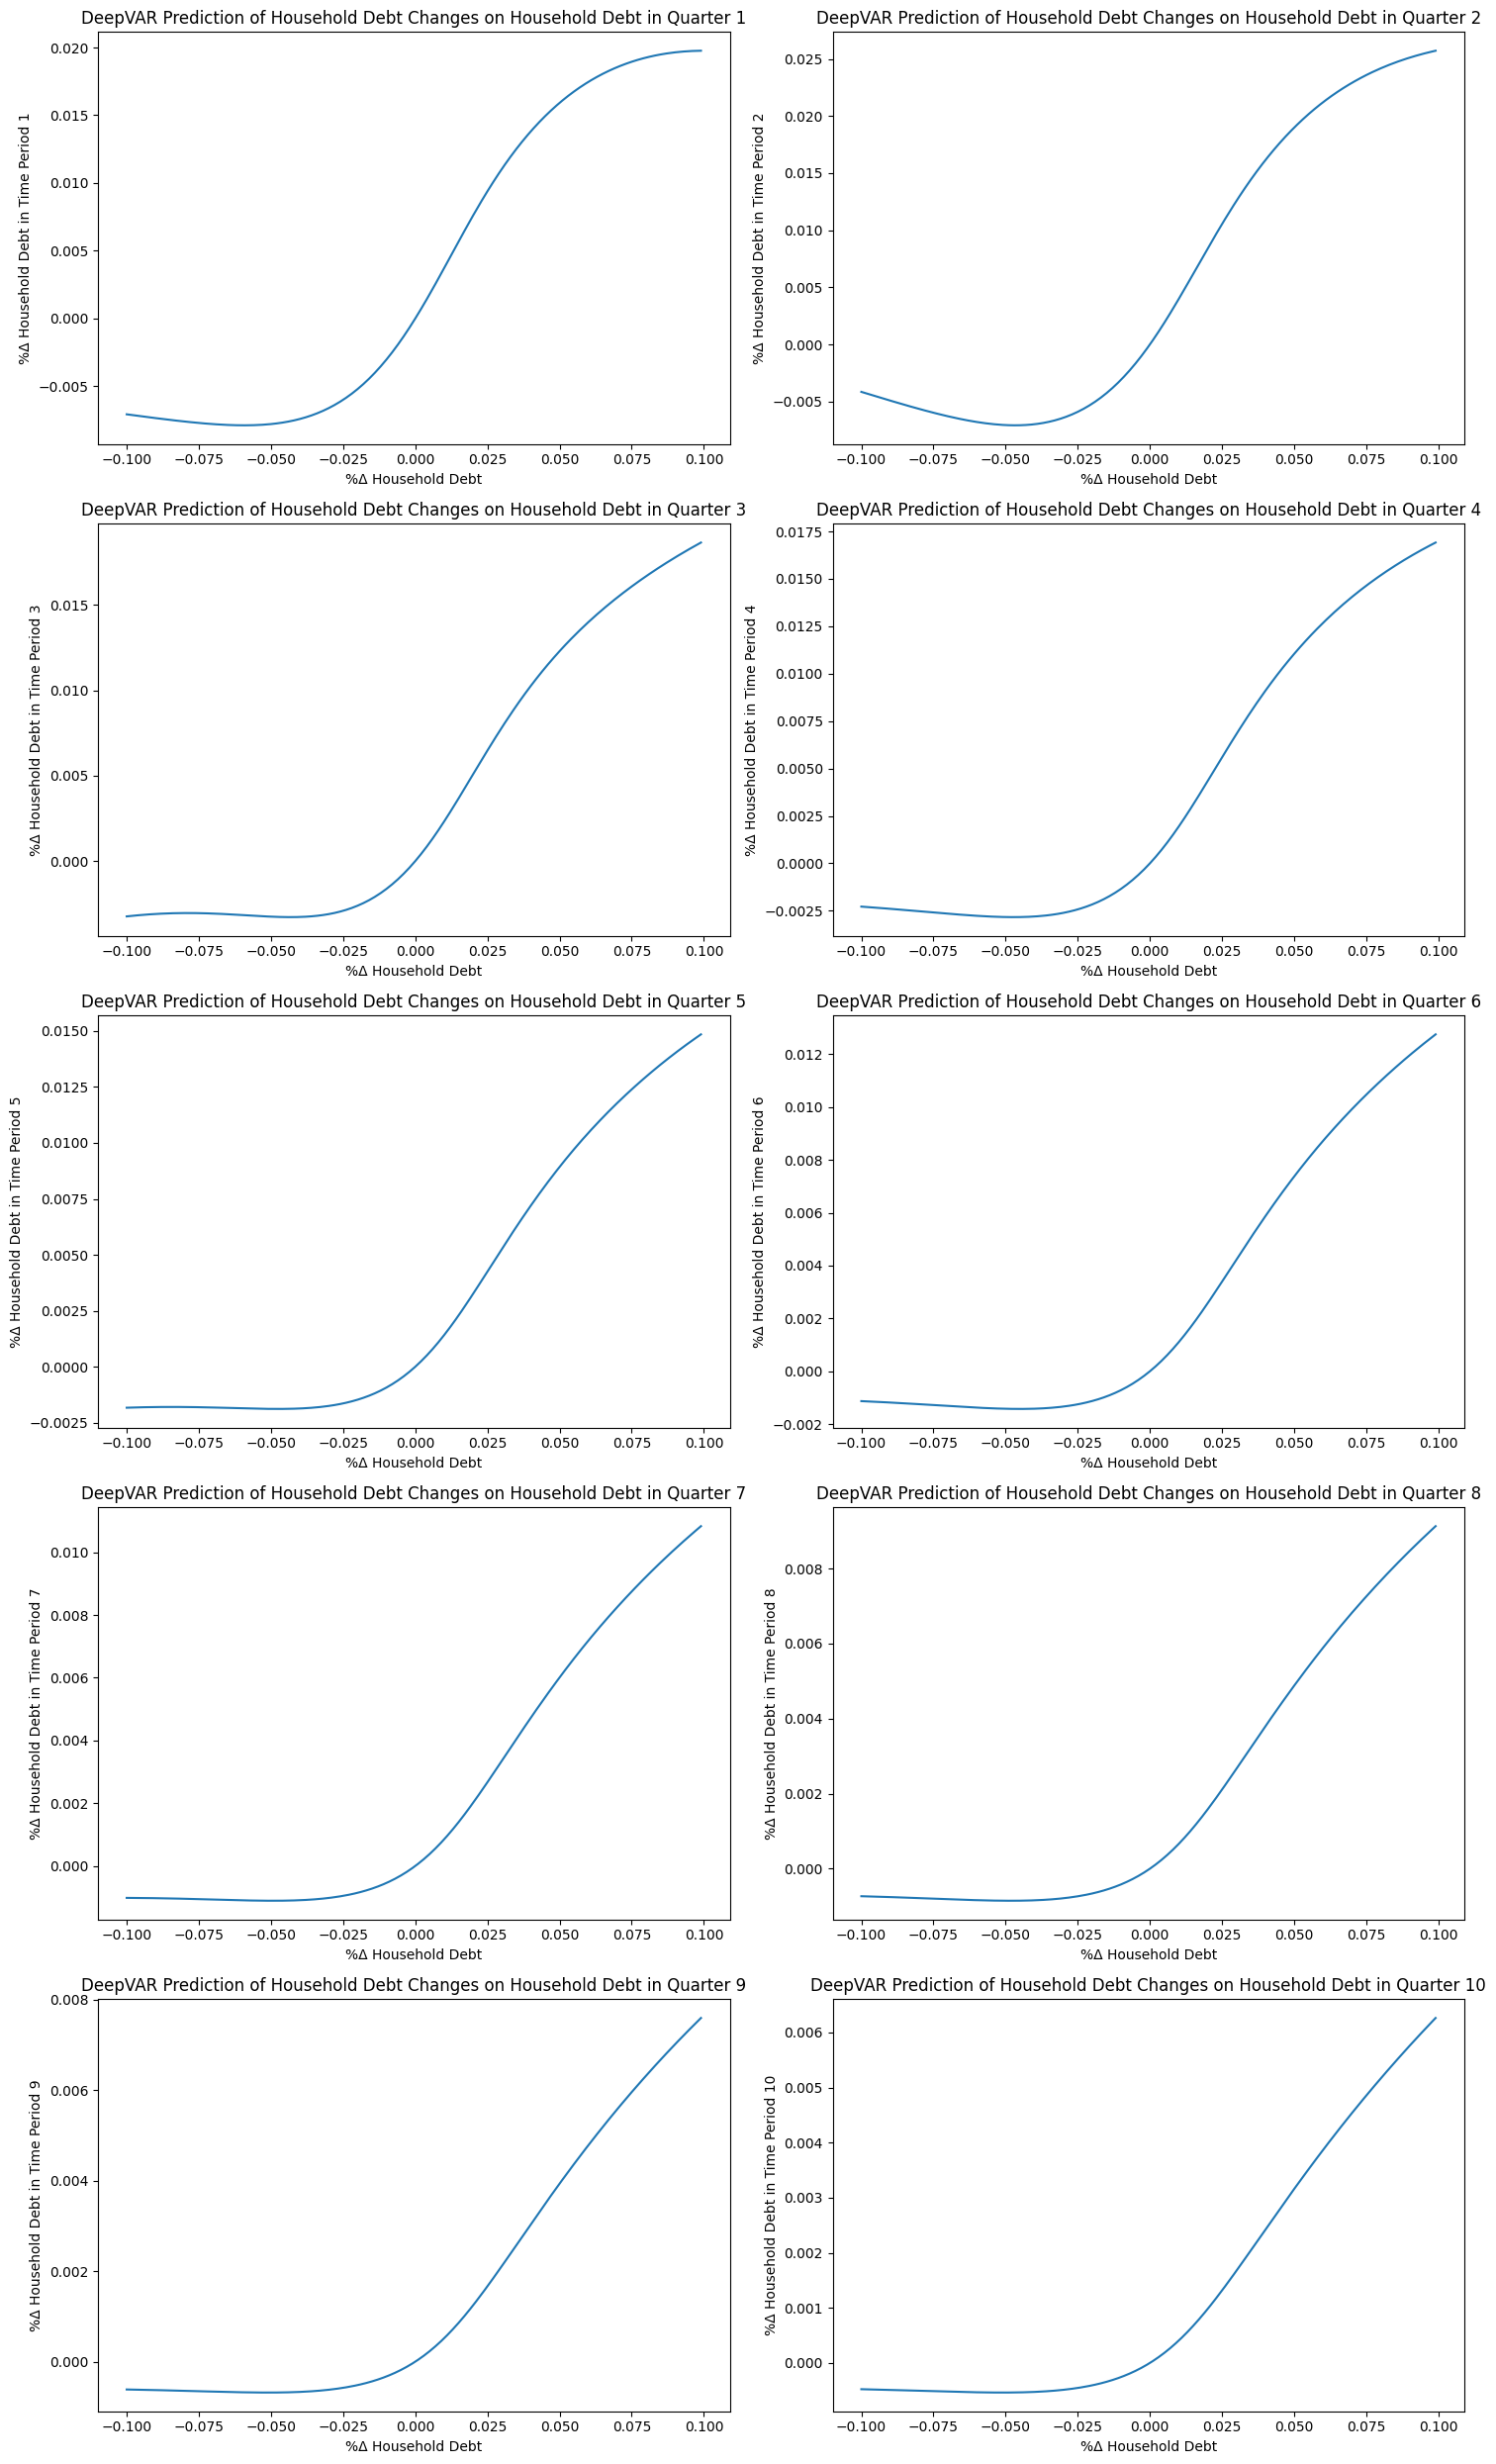

In [58]:
onesteppredictions = []
twosteppredictions = []
threesteppredictions = []
foursteppredictions = []
fivesteppredictions = []
sixsteppredictions = []
sevensteppredictions = []
eightsteppredictions = []
ninesteppredictions = []
tensteppredictions = []
index = []
for num in np.arange(-.1,.1, 0.001):
    prediction = irf.predict(df_zeros, inputs_nopr, 'log_hhd_lag1', num, 'log_hhd', 10, model_scaler_dict)
    # irf begins at 0 
    onesteppredictions.append(prediction[1])
    twosteppredictions.append(prediction[2])
    threesteppredictions.append(prediction[3])
    foursteppredictions.append(prediction[4])
    fivesteppredictions.append(prediction[5])
    sixsteppredictions.append(prediction[6])
    sevensteppredictions.append(prediction[7])
    eightsteppredictions.append(prediction[8])
    ninesteppredictions.append(prediction[9])
    tensteppredictions.append(prediction[10])
    index.append(num)



fig, axs = plt.subplots(5, 2, figsize=(15, 25))  # 5x2 grid of subplots
axs = axs.ravel()  # Flatten the 2D array of axes for easier indexing

predictions_list = [onesteppredictions, twosteppredictions, threesteppredictions, 
                   foursteppredictions, fivesteppredictions, sixsteppredictions,
                   sevensteppredictions, eightsteppredictions, ninesteppredictions,
                   tensteppredictions]

for i in range(10):
    axs[i].plot(index, predictions_list[i])
    axs[i].set_xlabel("%Δ Household Debt")
    axs[i].set_ylabel(f"%Δ Household Debt in Time Period {i+1}")
    axs[i].set_title(f"DeepVAR Prediction of Household Debt Changes on Household Debt in Quarter {i+1}")

plt.tight_layout() 
plt.show()

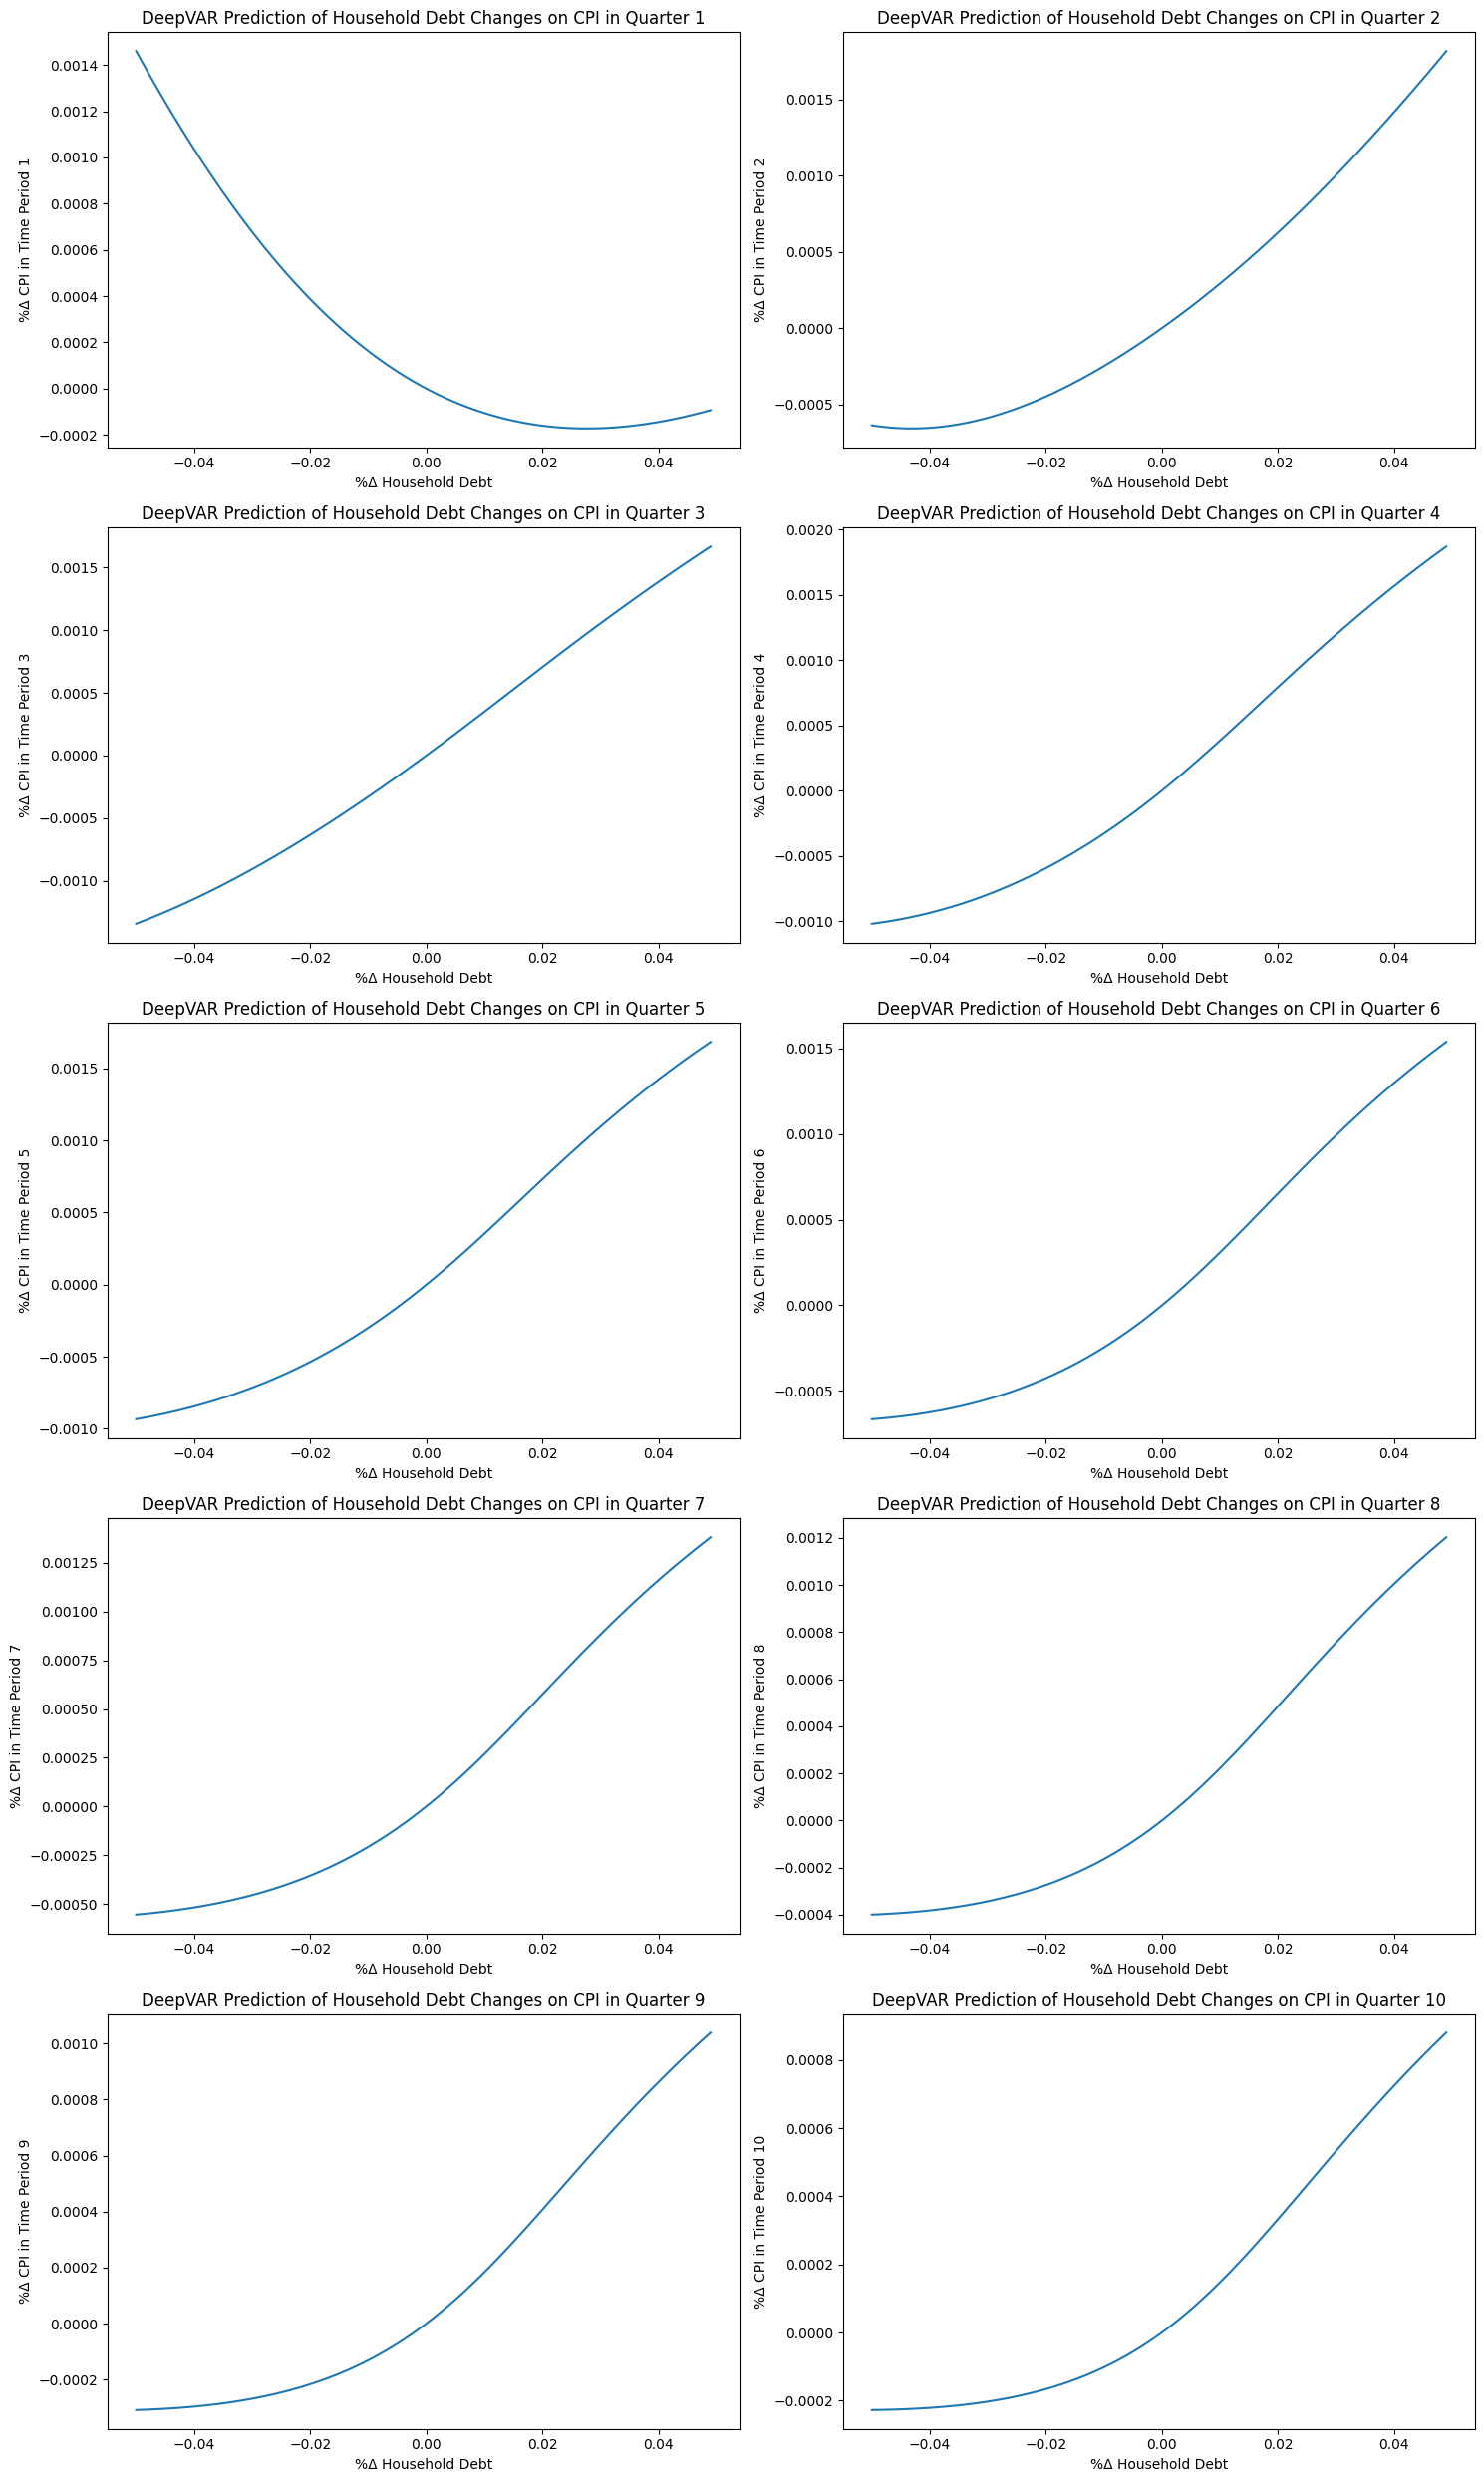

In [59]:
onesteppredictions = []
twosteppredictions = []
threesteppredictions = []
foursteppredictions = []
fivesteppredictions = []
sixsteppredictions = []
sevensteppredictions = []
eightsteppredictions = []
ninesteppredictions = []
tensteppredictions = []
index = []
for num in np.arange(-.05,.05, 0.001):
    prediction = irf.predict(df_zeros, inputs_nopr, 'log_hhd_lag1', num, 'log_CPI', 10, model_scaler_dict)
    # irf begins at 0 
    onesteppredictions.append(prediction[1])
    twosteppredictions.append(prediction[2])
    threesteppredictions.append(prediction[3])
    foursteppredictions.append(prediction[4])
    fivesteppredictions.append(prediction[5])
    sixsteppredictions.append(prediction[6])
    sevensteppredictions.append(prediction[7])
    eightsteppredictions.append(prediction[8])
    ninesteppredictions.append(prediction[9])
    tensteppredictions.append(prediction[10])
    index.append(num)



fig, axs = plt.subplots(5, 2, figsize=(15, 25))  # 5x2 grid of subplots
axs = axs.ravel()  # Flatten the 2D array of axes for easier indexing

predictions_list = [onesteppredictions, twosteppredictions, threesteppredictions, 
                   foursteppredictions, fivesteppredictions, sixsteppredictions,
                   sevensteppredictions, eightsteppredictions, ninesteppredictions,
                   tensteppredictions]

for i in range(10):
    axs[i].plot(index, predictions_list[i])
    axs[i].set_xlabel("%Δ Household Debt")
    axs[i].set_ylabel(f"%Δ CPI in Time Period {i+1}")
    axs[i].set_title(f"DeepVAR Prediction of Household Debt Changes on CPI in Quarter {i+1}")

plt.tight_layout() 
plt.show()